In [1]:
import pandas as pd

# Creating a variable to initially read in dataset for project.
eegDatasetCleaned = pd.read_csv('../eegDatasetCleanedForModel.csv')

In [2]:
# Observing cleaned EEG dataset and prints the first 5 rows.
print('\n EEG DATA SET HEAD, \n----------------------------------------------------\n')
print(eegDatasetCleaned.head(5))


 EEG DATA SET HEAD, 
----------------------------------------------------

     specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0  acuteStressDisorder         30.323572         29.558049        25.293659   
1  acuteStressDisorder         23.327612         34.845856        26.757280   
2  acuteStressDisorder         17.252066         15.155292        16.108600   
3  acuteStressDisorder         34.912317         39.136562        34.103989   
4  acuteStressDisorder          8.520262          9.073504        10.481318   

   AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0        25.431386        27.157943        26.064096        26.962306   
1        17.888937        18.073537        17.885986        19.711728   
2        18.438291        27.098033        19.733524        11.736709   
3        36.462923        37.904649        42.758987        38.002407   
4        16.898775        11.355207        10.495163        10.468839   

   AB.A.de

In [3]:
# Prints information about the EEG dataset.
eegDatasetCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1141 entries, specific.disorder to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140), object(1)
memory usage: 8.2+ MB


In [4]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG DATA SET SHAPE,\n----------------------------------------------------\n')
print('EEG dataset shape: \n', eegDatasetCleaned.shape)


 EEG DATA SET SHAPE,
----------------------------------------------------

EEG dataset shape: 
 (945, 1141)


In [5]:
# Checks data for missing values and spits a sum of entries missing
print('\n EEG DATA SET CHECK FOR MISSING ENTRIES, \n----------------------------------------------------\n')
print('Number of missing entries: ', eegDatasetCleaned.isnull().sum())


 EEG DATA SET CHECK FOR MISSING ENTRIES, 
----------------------------------------------------

Number of missing entries:  specific.disorder        0
AB.A.delta.a.FP1         0
AB.A.delta.b.FP2         0
AB.A.delta.c.F7          0
AB.A.delta.d.F3          0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1141, dtype: int64


In [6]:
# To observe the range of disorders available in the data the following code is used.
eegDatasetCleaned['specific.disorder'].unique()

array(['acuteStressDisorder', 'adjustmentDisorder', 'alcoholUseDisorder',
       'behavioralAddictionDisorder', 'bipolarDisorder',
       'depressiveDisorder', 'healthyControl',
       'obsessiveCompulsiveDisorder', 'panicDisorder',
       'posttraumaticStressDisorder', 'schizophrenia',
       'socialAnxietyDisorder'], dtype=object)

In [7]:
# Counts the number of each disorder recorded.
disorderOccurrence = eegDatasetCleaned.groupby(['specific.disorder']).size()
print('\n EEG DISORDER OCCURRENCES COUNT, \n----------------------------------------------------\n')
print(disorderOccurrence)


 EEG DISORDER OCCURRENCES COUNT, 
----------------------------------------------------

specific.disorder
acuteStressDisorder             38
adjustmentDisorder              38
alcoholUseDisorder              93
behavioralAddictionDisorder     93
bipolarDisorder                 67
depressiveDisorder             199
healthyControl                  95
obsessiveCompulsiveDisorder     46
panicDisorder                   59
posttraumaticStressDisorder     52
schizophrenia                  117
socialAnxietyDisorder           48
dtype: int64


<Axes: >

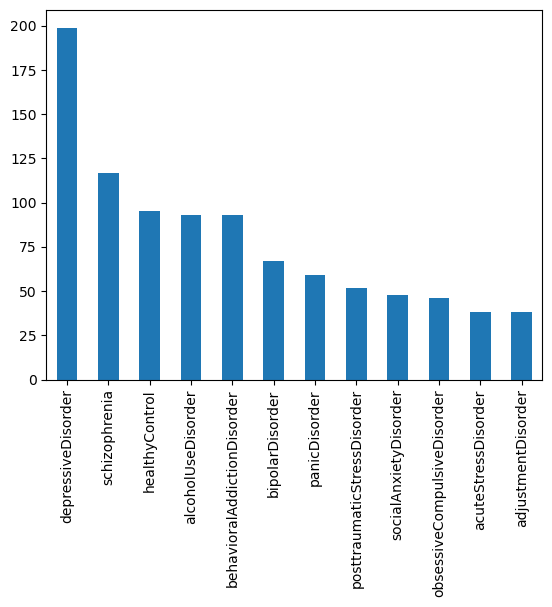

In [8]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot(kind='bar')

<Axes: ylabel='specific.disorder'>

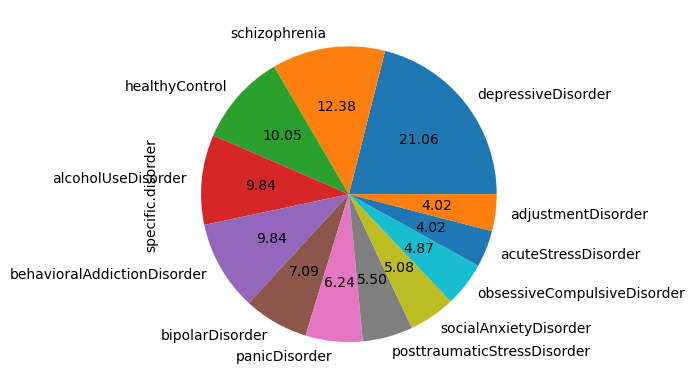

In [9]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot.pie(autopct='%.2f')

In [10]:
# As the model is only able to handle numeric data I had to convert the strings into integers so they could be processed.
# With the disorders converted to integers I next replaced the current strings with the new updated integer values.
eegDatasetCleaned['specific.disorder'] = eegDatasetCleaned['specific.disorder'].replace({
    'acuteStressDisorder':1, 
    'adjustmentDisorder':2, 
    'alcoholUseDisorder':3,
    'behavioralAddictionDisorder':4, 
    'bipolarDisorder':5,
    'depressiveDisorder':6, 
    'healthyControl':7,
    'obsessiveCompulsiveDisorder':8, 
    'panicDisorder':9,
    'posttraumaticStressDisorder':10, 
    'schizophrenia':11,
    'socialAnxietyDisorder':12
})

In [11]:
eegDatasetCleaned

,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,30.323572,29.558049,25.293659,25.431386,27.157943,26.064096,26.962306,16.140803,17.928469,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,1,23.327612,34.845856,26.757280,17.888937,18.073537,17.885986,19.711728,8.810296,16.205385,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,1,17.252066,15.155292,16.108600,18.438291,27.098033,19.733524,11.736709,11.327534,17.173299,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,1,34.912317,39.136562,34.103989,36.462923,37.904649,42.758987,38.002407,26.303330,32.681753,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,1,8.520262,9.073504,10.481318,16.898775,11.355207,10.495163,10.468839,9.622323,10.772125,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,12,17.585491,16.912154,16.676674,16.432607,12.560949,12.451371,12.126499,10.044354,9.446693,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,12,21.393045,23.018120,21.406082,22.840180,18.802283,19.366903,25.692413,10.097856,14.600330,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,12,19.543898,18.035856,20.696263,17.510941,19.099672,16.940304,15.605748,9.916546,15.404386,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,12,11.581630,16.528605,12.079624,19.150356,11.189703,10.523212,8.997941,5.713006,9.971759,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [12]:
# Generating a correlation matrix
corr = eegDatasetCleaned.corr()

<Axes: >

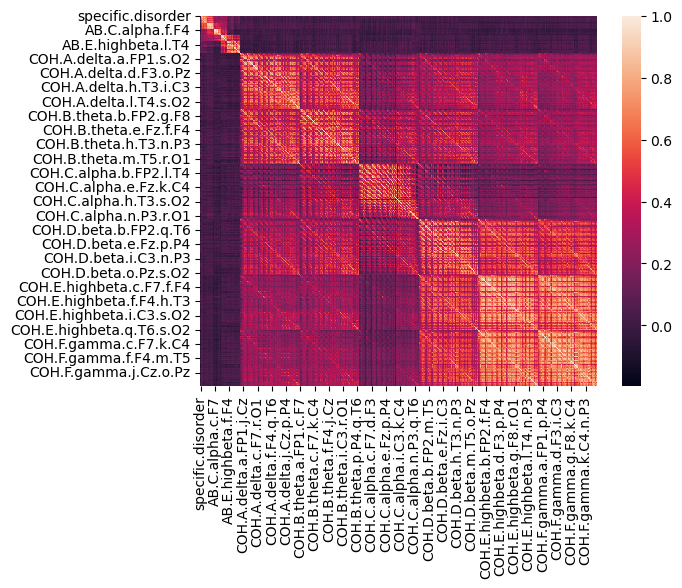

In [13]:
import seaborn as sns

# Generating a correlation heatmap to visually observe best correlations
sns.heatmap(corr)

In [14]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithOutDisorder = eegDatasetCleaned.loc[:, eegDatasetCleaned.columns != 'specific.disorder']

In [15]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# Handling Imbalanced Dataset
# SMOTE (Synthetic Minority Oversampling Technique) will be used as it helps with oversampling the examples
# in the minority class.

# Select random data from the minority class.
# Calculate the Euclidean distance between the random data and its k nearest neighbors.
# Multiply the difference with a random number between 0 and 1. Then, add the result to the minority class as a synthetic sample.
# Repeat the procedure until the expected proportion of minority class is met.

# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
xSmote, ySmote = resample.fit_resample(eegTrainingDataWithOutDisorder, eegDatasetCleaned['specific.disorder'])

In [16]:
# Prints information about the EEG training smote dataset.
xSmote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Columns: 1140 entries, AB.A.delta.a.FP1 to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140)
memory usage: 20.8 MB


In [17]:
# Prints information about the EEG true smote dataset.
ySmote.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2388 entries, 0 to 2387
Series name: specific.disorder
Non-Null Count  Dtype
--------------  -----
2388 non-null   int64
dtypes: int64(1)
memory usage: 18.8 KB


In [18]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG TRAINING DATA SET SHAPE AFTER SMOTE,\n----------------------------------------------------\n')
print('EEG training dataset shape after smote: \n', xSmote.shape)


 EEG TRAINING DATA SET SHAPE AFTER SMOTE,
----------------------------------------------------

EEG training dataset shape after smote: 
 (2388, 1140)


In [19]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG TRUE VALUE DATA SET SHAPE AFTER SMOTE,\n----------------------------------------------------\n')
print('EEG true value dataset shape after smote: \n', ySmote.shape)


 EEG TRUE VALUE DATA SET SHAPE AFTER SMOTE,
----------------------------------------------------

EEG true value dataset shape after smote: 
 (2388,)


<Axes: >

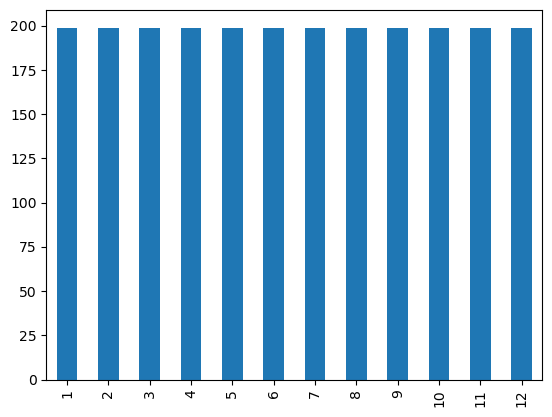

In [20]:
# Creating a visual plot to observe the y values after smote applied.
ySmote.value_counts().plot(kind='bar')

<Axes: ylabel='specific.disorder'>

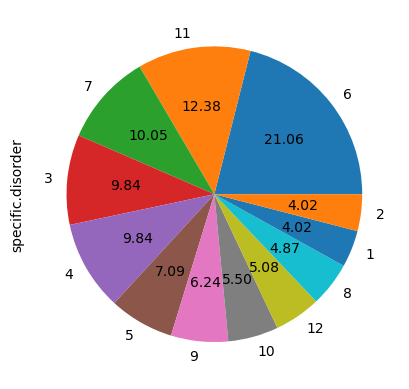

In [21]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot.pie(autopct='%.2f')

In [22]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(xSmote, ySmote, test_size=0.3, random_state=42)

In [23]:
import catboost as cb
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = cb.CatBoostRegressor(**params, silent=True)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

In [24]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

[I 2023-09-04 18:02:37,164] A new study created in memory with name: no-name-8b30c48e-0813-4b7a-a43a-ccf70ca618a8
[I 2023-09-04 18:09:08,413] Trial 0 finished with value: 1.9108540395823475 and parameters: {'learning_rate': 0.014921934875651268, 'depth': 7, 'subsample': 0.3389079767865949, 'colsample_bylevel': 0.5739311506052827, 'min_data_in_leaf': 57}. Best is trial 0 with value: 1.9108540395823475.
[I 2023-09-04 18:10:07,422] Trial 1 finished with value: 1.9297982522995203 and parameters: {'learning_rate': 0.04002753040120678, 'depth': 4, 'subsample': 0.27313930316010626, 'colsample_bylevel': 0.5826385092560352, 'min_data_in_leaf': 76}. Best is trial 0 with value: 1.9108540395823475.
[I 2023-09-04 18:10:41,725] Trial 2 finished with value: 2.8194014905791387 and parameters: {'learning_rate': 0.0038436556434189983, 'depth': 4, 'subsample': 0.549479354892282, 'colsample_bylevel': 0.2600281062087987, 'min_data_in_leaf': 66}. Best is trial 0 with value: 1.9108540395823475.
[I 2023-09-04

[I 2023-09-04 21:17:59,994] Trial 28 finished with value: 1.776738089186485 and parameters: {'learning_rate': 0.06067184869779568, 'depth': 5, 'subsample': 0.21375472082869507, 'colsample_bylevel': 0.3291962728390663, 'min_data_in_leaf': 67}. Best is trial 24 with value: 1.7203566626689826.
[I 2023-09-04 21:20:53,597] Trial 29 finished with value: 1.946537756204782 and parameters: {'learning_rate': 0.017475952133469343, 'depth': 6, 'subsample': 0.3214582981922124, 'colsample_bylevel': 0.44569743527455197, 'min_data_in_leaf': 60}. Best is trial 24 with value: 1.7203566626689826.


In [25]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'learning_rate': 0.05175107800111566, 'depth': 8, 'subsample': 0.19893889352043026, 'colsample_bylevel': 0.3368780989824789, 'min_data_in_leaf': 79}
Best RMSE: 1.7203566626689826


In [26]:
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=5000,
                           learning_rate=0.1,
                           depth=6,
                          min_data_in_leaf=13)

In [27]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

0:	learn: 2.4488978	total: 2.78s	remaining: 3h 51m 21s
1:	learn: 2.4076427	total: 5.51s	remaining: 3h 49m 27s
2:	learn: 2.3809133	total: 12s	remaining: 5h 32m 51s
3:	learn: 2.3520602	total: 16.1s	remaining: 5h 34m 21s
4:	learn: 2.3225954	total: 18.9s	remaining: 5h 13m 58s
5:	learn: 2.2871604	total: 21.7s	remaining: 5h 1m 6s
6:	learn: 2.2532967	total: 24.5s	remaining: 4h 50m 53s
7:	learn: 2.2274645	total: 27.3s	remaining: 4h 43m 24s
8:	learn: 2.2028141	total: 30s	remaining: 4h 37m 21s
9:	learn: 2.1726440	total: 32.8s	remaining: 4h 33m
10:	learn: 2.1434168	total: 39.2s	remaining: 4h 56m 14s
11:	learn: 2.1128355	total: 43.1s	remaining: 4h 58m 49s
12:	learn: 2.0854430	total: 45.9s	remaining: 4h 53m 26s
13:	learn: 2.0615117	total: 48.7s	remaining: 4h 48m 59s
14:	learn: 2.0292534	total: 51.5s	remaining: 4h 45m 9s
15:	learn: 2.0020131	total: 54.2s	remaining: 4h 41m 36s
16:	learn: 1.9770156	total: 57.1s	remaining: 4h 38m 42s
17:	learn: 1.9520533	total: 59.9s	remaining: 4h 36m 8s
18:	learn: 1.9

145:	learn: 0.6467990	total: 8m 23s	remaining: 4h 38m 43s
146:	learn: 0.6432936	total: 8m 25s	remaining: 4h 38m 20s
147:	learn: 0.6389219	total: 8m 32s	remaining: 4h 39m 58s
148:	learn: 0.6348481	total: 8m 36s	remaining: 4h 40m 11s
149:	learn: 0.6316056	total: 8m 39s	remaining: 4h 39m 49s
150:	learn: 0.6257796	total: 8m 42s	remaining: 4h 39m 26s
151:	learn: 0.6203619	total: 8m 44s	remaining: 4h 39m 1s
152:	learn: 0.6161253	total: 8m 47s	remaining: 4h 38m 36s
153:	learn: 0.6102774	total: 8m 50s	remaining: 4h 38m 13s
154:	learn: 0.6054946	total: 8m 53s	remaining: 4h 37m 48s
155:	learn: 0.6030993	total: 8m 59s	remaining: 4h 39m 15s
156:	learn: 0.5991405	total: 9m 3s	remaining: 4h 39m 29s
157:	learn: 0.5940260	total: 9m 6s	remaining: 4h 39m 5s
158:	learn: 0.5926227	total: 9m 9s	remaining: 4h 38m 41s
159:	learn: 0.5893676	total: 9m 12s	remaining: 4h 38m 19s
160:	learn: 0.5856791	total: 9m 14s	remaining: 4h 37m 58s
161:	learn: 0.5827903	total: 9m 17s	remaining: 4h 37m 37s
162:	learn: 0.58089

286:	learn: 0.3368047	total: 16m 27s	remaining: 4h 30m 20s
287:	learn: 0.3362432	total: 16m 30s	remaining: 4h 30m 6s
288:	learn: 0.3341178	total: 16m 33s	remaining: 4h 29m 53s
289:	learn: 0.3328550	total: 16m 36s	remaining: 4h 29m 39s
290:	learn: 0.3309658	total: 16m 39s	remaining: 4h 29m 26s
291:	learn: 0.3295930	total: 16m 41s	remaining: 4h 29m 13s
292:	learn: 0.3279422	total: 16m 44s	remaining: 4h 29m 1s
293:	learn: 0.3263014	total: 16m 51s	remaining: 4h 29m 47s
294:	learn: 0.3245550	total: 16m 55s	remaining: 4h 30m
295:	learn: 0.3232535	total: 16m 58s	remaining: 4h 29m 52s
296:	learn: 0.3227284	total: 17m 1s	remaining: 4h 29m 42s
297:	learn: 0.3215759	total: 17m 5s	remaining: 4h 29m 33s
298:	learn: 0.3197844	total: 17m 8s	remaining: 4h 29m 25s
299:	learn: 0.3184460	total: 17m 10s	remaining: 4h 29m 12s
300:	learn: 0.3170812	total: 17m 17s	remaining: 4h 29m 57s
301:	learn: 0.3162555	total: 17m 21s	remaining: 4h 30m 6s
302:	learn: 0.3147138	total: 17m 24s	remaining: 4h 29m 52s
303:	le

426:	learn: 0.2071146	total: 24m 28s	remaining: 4h 22m 8s
427:	learn: 0.2063416	total: 24m 31s	remaining: 4h 21m 58s
428:	learn: 0.2058171	total: 24m 38s	remaining: 4h 22m 33s
429:	learn: 0.2052799	total: 24m 42s	remaining: 4h 22m 34s
430:	learn: 0.2045854	total: 24m 45s	remaining: 4h 22m 27s
431:	learn: 0.2039306	total: 24m 48s	remaining: 4h 22m 17s
432:	learn: 0.2027267	total: 24m 51s	remaining: 4h 22m 7s
433:	learn: 0.2022529	total: 24m 54s	remaining: 4h 21m 58s
434:	learn: 0.2017432	total: 24m 56s	remaining: 4h 21m 48s
435:	learn: 0.2011221	total: 24m 59s	remaining: 4h 21m 40s
436:	learn: 0.2005745	total: 25m 6s	remaining: 4h 22m 13s
437:	learn: 0.1997599	total: 25m 10s	remaining: 4h 22m 17s
438:	learn: 0.1989895	total: 25m 13s	remaining: 4h 22m 7s
439:	learn: 0.1985646	total: 25m 16s	remaining: 4h 21m 57s
440:	learn: 0.1981202	total: 25m 19s	remaining: 4h 21m 48s
441:	learn: 0.1975973	total: 25m 22s	remaining: 4h 21m 38s
442:	learn: 0.1969435	total: 25m 25s	remaining: 4h 21m 29s
4

566:	learn: 0.1399231	total: 32m 37s	remaining: 4h 15m 7s
567:	learn: 0.1394732	total: 32m 40s	remaining: 4h 14m 58s
568:	learn: 0.1388324	total: 32m 43s	remaining: 4h 14m 50s
569:	learn: 0.1382677	total: 32m 46s	remaining: 4h 14m 41s
570:	learn: 0.1378588	total: 32m 49s	remaining: 4h 14m 33s
571:	learn: 0.1376269	total: 32m 55s	remaining: 4h 14m 52s
572:	learn: 0.1371722	total: 32m 59s	remaining: 4h 14m 53s
573:	learn: 0.1368428	total: 33m 2s	remaining: 4h 14m 44s
574:	learn: 0.1363043	total: 33m 5s	remaining: 4h 14m 36s
575:	learn: 0.1358568	total: 33m 7s	remaining: 4h 14m 27s
576:	learn: 0.1354857	total: 33m 10s	remaining: 4h 14m 19s
577:	learn: 0.1351582	total: 33m 13s	remaining: 4h 14m 10s
578:	learn: 0.1348595	total: 33m 16s	remaining: 4h 14m 2s
579:	learn: 0.1344583	total: 33m 22s	remaining: 4h 14m 21s
580:	learn: 0.1337872	total: 33m 26s	remaining: 4h 14m 21s
581:	learn: 0.1331166	total: 33m 29s	remaining: 4h 14m 13s
582:	learn: 0.1326944	total: 33m 32s	remaining: 4h 14m 6s
583

707:	learn: 0.0975492	total: 40m 41s	remaining: 4h 6m 38s
708:	learn: 0.0972746	total: 40m 44s	remaining: 4h 6m 31s
709:	learn: 0.0969308	total: 40m 46s	remaining: 4h 6m 24s
710:	learn: 0.0967077	total: 40m 49s	remaining: 4h 6m 17s
711:	learn: 0.0964254	total: 40m 52s	remaining: 4h 6m 9s
712:	learn: 0.0962587	total: 40m 55s	remaining: 4h 6m 2s
713:	learn: 0.0960768	total: 40m 58s	remaining: 4h 5m 55s
714:	learn: 0.0959014	total: 41m 4s	remaining: 4h 6m 11s
715:	learn: 0.0958331	total: 41m 8s	remaining: 4h 6m 9s
716:	learn: 0.0957064	total: 41m 11s	remaining: 4h 6m 2s
717:	learn: 0.0955020	total: 41m 14s	remaining: 4h 5m 55s
718:	learn: 0.0952466	total: 41m 16s	remaining: 4h 5m 47s
719:	learn: 0.0948986	total: 41m 19s	remaining: 4h 5m 40s
720:	learn: 0.0946021	total: 41m 22s	remaining: 4h 5m 33s
721:	learn: 0.0944911	total: 41m 25s	remaining: 4h 5m 26s
722:	learn: 0.0941671	total: 41m 32s	remaining: 4h 5m 42s
723:	learn: 0.0940662	total: 41m 36s	remaining: 4h 5m 42s
724:	learn: 0.093891

850:	learn: 0.0728711	total: 48m 51s	remaining: 3h 58m 13s
851:	learn: 0.0727645	total: 48m 54s	remaining: 3h 58m 6s
852:	learn: 0.0726173	total: 48m 57s	remaining: 3h 58m
853:	learn: 0.0725412	total: 49m	remaining: 3h 57m 53s
854:	learn: 0.0722784	total: 49m 2s	remaining: 3h 57m 46s
855:	learn: 0.0721076	total: 49m 5s	remaining: 3h 57m 40s
856:	learn: 0.0720186	total: 49m 12s	remaining: 3h 57m 53s
857:	learn: 0.0718587	total: 49m 16s	remaining: 3h 57m 51s
858:	learn: 0.0717779	total: 49m 19s	remaining: 3h 57m 45s
859:	learn: 0.0716138	total: 49m 22s	remaining: 3h 57m 39s
860:	learn: 0.0715307	total: 49m 24s	remaining: 3h 57m 32s
861:	learn: 0.0714698	total: 49m 27s	remaining: 3h 57m 26s
862:	learn: 0.0713198	total: 49m 30s	remaining: 3h 57m 19s
863:	learn: 0.0711473	total: 49m 33s	remaining: 3h 57m 13s
864:	learn: 0.0710059	total: 49m 40s	remaining: 3h 57m 25s
865:	learn: 0.0708893	total: 49m 44s	remaining: 3h 57m 25s
866:	learn: 0.0707638	total: 49m 47s	remaining: 3h 57m 19s
867:	lea

990:	learn: 0.0569534	total: 56m 50s	remaining: 3h 49m 55s
991:	learn: 0.0568798	total: 56m 54s	remaining: 3h 49m 53s
992:	learn: 0.0568215	total: 56m 56s	remaining: 3h 49m 47s
993:	learn: 0.0567791	total: 56m 59s	remaining: 3h 49m 41s
994:	learn: 0.0566768	total: 57m 2s	remaining: 3h 49m 35s
995:	learn: 0.0566144	total: 57m 5s	remaining: 3h 49m 29s
996:	learn: 0.0565641	total: 57m 7s	remaining: 3h 49m 23s
997:	learn: 0.0563807	total: 57m 10s	remaining: 3h 49m 17s
998:	learn: 0.0562996	total: 57m 17s	remaining: 3h 49m 26s
999:	learn: 0.0561667	total: 57m 21s	remaining: 3h 49m 24s
1000:	learn: 0.0560849	total: 57m 24s	remaining: 3h 49m 18s
1001:	learn: 0.0560118	total: 57m 26s	remaining: 3h 49m 13s
1002:	learn: 0.0558905	total: 57m 29s	remaining: 3h 49m 7s
1003:	learn: 0.0558092	total: 57m 32s	remaining: 3h 49m 1s
1004:	learn: 0.0557585	total: 57m 35s	remaining: 3h 48m 55s
1005:	learn: 0.0556662	total: 57m 38s	remaining: 3h 48m 48s
1006:	learn: 0.0555794	total: 57m 44s	remaining: 3h 48m

1127:	learn: 0.0465945	total: 1h 4m 38s	remaining: 3h 41m 53s
1128:	learn: 0.0465251	total: 1h 4m 41s	remaining: 3h 41m 48s
1129:	learn: 0.0464807	total: 1h 4m 44s	remaining: 3h 41m 42s
1130:	learn: 0.0463824	total: 1h 4m 47s	remaining: 3h 41m 37s
1131:	learn: 0.0463580	total: 1h 4m 49s	remaining: 3h 41m 31s
1132:	learn: 0.0462862	total: 1h 4m 52s	remaining: 3h 41m 26s
1133:	learn: 0.0462079	total: 1h 4m 59s	remaining: 3h 41m 34s
1134:	learn: 0.0461103	total: 1h 5m 3s	remaining: 3h 41m 32s
1135:	learn: 0.0460494	total: 1h 5m 6s	remaining: 3h 41m 26s
1136:	learn: 0.0460039	total: 1h 5m 8s	remaining: 3h 41m 20s
1137:	learn: 0.0459252	total: 1h 5m 11s	remaining: 3h 41m 15s
1138:	learn: 0.0458499	total: 1h 5m 14s	remaining: 3h 41m 9s
1139:	learn: 0.0457430	total: 1h 5m 17s	remaining: 3h 41m 3s
1140:	learn: 0.0456843	total: 1h 5m 20s	remaining: 3h 40m 58s
1141:	learn: 0.0456064	total: 1h 5m 26s	remaining: 3h 41m 4s
1142:	learn: 0.0455453	total: 1h 5m 30s	remaining: 3h 41m 3s
1143:	learn: 0.

1260:	learn: 0.0391448	total: 1h 12m 15s	remaining: 3h 34m 14s
1261:	learn: 0.0391091	total: 1h 12m 17s	remaining: 3h 34m 8s
1262:	learn: 0.0390235	total: 1h 12m 20s	remaining: 3h 34m 3s
1263:	learn: 0.0389666	total: 1h 12m 23s	remaining: 3h 33m 58s
1264:	learn: 0.0389085	total: 1h 12m 26s	remaining: 3h 33m 52s
1265:	learn: 0.0388426	total: 1h 12m 29s	remaining: 3h 33m 47s
1266:	learn: 0.0387932	total: 1h 12m 31s	remaining: 3h 33m 42s
1267:	learn: 0.0387631	total: 1h 12m 38s	remaining: 3h 33m 47s
1268:	learn: 0.0386924	total: 1h 12m 42s	remaining: 3h 33m 45s
1269:	learn: 0.0386272	total: 1h 12m 45s	remaining: 3h 33m 40s
1270:	learn: 0.0385643	total: 1h 12m 47s	remaining: 3h 33m 35s
1271:	learn: 0.0384996	total: 1h 12m 50s	remaining: 3h 33m 29s
1272:	learn: 0.0384559	total: 1h 12m 53s	remaining: 3h 33m 24s
1273:	learn: 0.0384117	total: 1h 12m 56s	remaining: 3h 33m 19s
1274:	learn: 0.0383440	total: 1h 12m 59s	remaining: 3h 33m 13s
1275:	learn: 0.0382930	total: 1h 13m 5s	remaining: 3h 33m

1391:	learn: 0.0336959	total: 1h 19m 37s	remaining: 3h 26m 22s
1392:	learn: 0.0336647	total: 1h 19m 39s	remaining: 3h 26m 16s
1393:	learn: 0.0336248	total: 1h 19m 42s	remaining: 3h 26m 11s
1394:	learn: 0.0335827	total: 1h 19m 49s	remaining: 3h 26m 16s
1395:	learn: 0.0335420	total: 1h 19m 52s	remaining: 3h 26m 13s
1396:	learn: 0.0335060	total: 1h 19m 55s	remaining: 3h 26m 8s
1397:	learn: 0.0334847	total: 1h 19m 58s	remaining: 3h 26m 3s
1398:	learn: 0.0334608	total: 1h 20m 1s	remaining: 3h 25m 58s
1399:	learn: 0.0334213	total: 1h 20m 3s	remaining: 3h 25m 53s
1400:	learn: 0.0333648	total: 1h 20m 6s	remaining: 3h 25m 47s
1401:	learn: 0.0333283	total: 1h 20m 9s	remaining: 3h 25m 42s
1402:	learn: 0.0332964	total: 1h 20m 15s	remaining: 3h 25m 46s
1403:	learn: 0.0332633	total: 1h 20m 19s	remaining: 3h 25m 44s
1404:	learn: 0.0332407	total: 1h 20m 22s	remaining: 3h 25m 39s
1405:	learn: 0.0331936	total: 1h 20m 25s	remaining: 3h 25m 34s
1406:	learn: 0.0331487	total: 1h 20m 28s	remaining: 3h 25m 29

1522:	learn: 0.0292956	total: 1h 26m 59s	remaining: 3h 18m 35s
1523:	learn: 0.0292564	total: 1h 27m 3s	remaining: 3h 18m 33s
1524:	learn: 0.0292465	total: 1h 27m 6s	remaining: 3h 18m 28s
1525:	learn: 0.0292336	total: 1h 27m 8s	remaining: 3h 18m 23s
1526:	learn: 0.0291936	total: 1h 27m 11s	remaining: 3h 18m 18s
1527:	learn: 0.0291598	total: 1h 27m 14s	remaining: 3h 18m 13s
1528:	learn: 0.0291447	total: 1h 27m 17s	remaining: 3h 18m 8s
1529:	learn: 0.0291174	total: 1h 27m 19s	remaining: 3h 18m 3s
1530:	learn: 0.0291030	total: 1h 27m 26s	remaining: 3h 18m 7s
1531:	learn: 0.0290647	total: 1h 27m 30s	remaining: 3h 18m 4s
1532:	learn: 0.0290415	total: 1h 27m 32s	remaining: 3h 17m 59s
1533:	learn: 0.0290263	total: 1h 27m 35s	remaining: 3h 17m 55s
1534:	learn: 0.0290037	total: 1h 27m 38s	remaining: 3h 17m 50s
1535:	learn: 0.0289776	total: 1h 27m 41s	remaining: 3h 17m 45s
1536:	learn: 0.0289494	total: 1h 27m 44s	remaining: 3h 17m 40s
1537:	learn: 0.0289244	total: 1h 27m 46s	remaining: 3h 17m 35s

1653:	learn: 0.0258299	total: 1h 34m 21s	remaining: 3h 10m 52s
1654:	learn: 0.0258124	total: 1h 34m 23s	remaining: 3h 10m 47s
1655:	learn: 0.0257884	total: 1h 34m 26s	remaining: 3h 10m 42s
1656:	learn: 0.0257695	total: 1h 34m 29s	remaining: 3h 10m 38s
1657:	learn: 0.0257425	total: 1h 34m 32s	remaining: 3h 10m 33s
1658:	learn: 0.0257133	total: 1h 34m 38s	remaining: 3h 10m 36s
1659:	learn: 0.0256867	total: 1h 34m 42s	remaining: 3h 10m 33s
1660:	learn: 0.0256595	total: 1h 34m 45s	remaining: 3h 10m 29s
1661:	learn: 0.0256339	total: 1h 34m 48s	remaining: 3h 10m 24s
1662:	learn: 0.0255989	total: 1h 34m 50s	remaining: 3h 10m 19s
1663:	learn: 0.0255686	total: 1h 34m 53s	remaining: 3h 10m 14s
1664:	learn: 0.0255320	total: 1h 34m 56s	remaining: 3h 10m 10s
1665:	learn: 0.0255139	total: 1h 34m 59s	remaining: 3h 10m 5s
1666:	learn: 0.0254741	total: 1h 35m 5s	remaining: 3h 10m 8s
1667:	learn: 0.0254492	total: 1h 35m 9s	remaining: 3h 10m 5s
1668:	learn: 0.0254219	total: 1h 35m 12s	remaining: 3h 10m 1

1786:	learn: 0.0228616	total: 1h 41m 51s	remaining: 3h 3m 7s
1787:	learn: 0.0228398	total: 1h 41m 55s	remaining: 3h 3m 5s
1788:	learn: 0.0228190	total: 1h 41m 57s	remaining: 3h 3m
1789:	learn: 0.0227901	total: 1h 42m	remaining: 3h 2m 56s
1790:	learn: 0.0227767	total: 1h 42m 3s	remaining: 3h 2m 51s
1791:	learn: 0.0227542	total: 1h 42m 6s	remaining: 3h 2m 46s
1792:	learn: 0.0227314	total: 1h 42m 8s	remaining: 3h 2m 42s
1793:	learn: 0.0227170	total: 1h 42m 11s	remaining: 3h 2m 37s
1794:	learn: 0.0226964	total: 1h 42m 18s	remaining: 3h 2m 39s
1795:	learn: 0.0226793	total: 1h 42m 22s	remaining: 3h 2m 37s
1796:	learn: 0.0226630	total: 1h 42m 24s	remaining: 3h 2m 32s
1797:	learn: 0.0226437	total: 1h 42m 27s	remaining: 3h 2m 27s
1798:	learn: 0.0226157	total: 1h 42m 30s	remaining: 3h 2m 23s
1799:	learn: 0.0225970	total: 1h 42m 33s	remaining: 3h 2m 18s
1800:	learn: 0.0225668	total: 1h 42m 35s	remaining: 3h 2m 14s
1801:	learn: 0.0225475	total: 1h 42m 38s	remaining: 3h 2m 9s
1802:	learn: 0.0225319

1919:	learn: 0.0206333	total: 1h 49m 19s	remaining: 2h 55m 22s
1920:	learn: 0.0206126	total: 1h 49m 22s	remaining: 2h 55m 18s
1921:	learn: 0.0206046	total: 1h 49m 28s	remaining: 2h 55m 19s
1922:	learn: 0.0205950	total: 1h 49m 32s	remaining: 2h 55m 16s
1923:	learn: 0.0205733	total: 1h 49m 35s	remaining: 2h 55m 12s
1924:	learn: 0.0205448	total: 1h 49m 38s	remaining: 2h 55m 7s
1925:	learn: 0.0205300	total: 1h 49m 40s	remaining: 2h 55m 3s
1926:	learn: 0.0205241	total: 1h 49m 43s	remaining: 2h 54m 58s
1927:	learn: 0.0205157	total: 1h 49m 46s	remaining: 2h 54m 54s
1928:	learn: 0.0204959	total: 1h 49m 49s	remaining: 2h 54m 50s
1929:	learn: 0.0204844	total: 1h 49m 55s	remaining: 2h 54m 51s
1930:	learn: 0.0204735	total: 1h 49m 59s	remaining: 2h 54m 49s
1931:	learn: 0.0204587	total: 1h 50m 2s	remaining: 2h 54m 44s
1932:	learn: 0.0204360	total: 1h 50m 5s	remaining: 2h 54m 40s
1933:	learn: 0.0204237	total: 1h 50m 7s	remaining: 2h 54m 35s
1934:	learn: 0.0204086	total: 1h 50m 10s	remaining: 2h 54m 3

2050:	learn: 0.0187317	total: 1h 56m 50s	remaining: 2h 47m 59s
2051:	learn: 0.0187149	total: 1h 56m 52s	remaining: 2h 47m 55s
2052:	learn: 0.0187016	total: 1h 56m 55s	remaining: 2h 47m 50s
2053:	learn: 0.0186788	total: 1h 56m 58s	remaining: 2h 47m 46s
2054:	learn: 0.0186722	total: 1h 57m 1s	remaining: 2h 47m 42s
2055:	learn: 0.0186648	total: 1h 57m 4s	remaining: 2h 47m 37s
2056:	learn: 0.0186527	total: 1h 57m 6s	remaining: 2h 47m 33s
2057:	learn: 0.0186399	total: 1h 57m 13s	remaining: 2h 47m 34s
2058:	learn: 0.0186275	total: 1h 57m 17s	remaining: 2h 47m 32s
2059:	learn: 0.0186165	total: 1h 57m 20s	remaining: 2h 47m 27s
2060:	learn: 0.0186081	total: 1h 57m 23s	remaining: 2h 47m 23s
2061:	learn: 0.0185920	total: 1h 57m 25s	remaining: 2h 47m 19s
2062:	learn: 0.0185835	total: 1h 57m 28s	remaining: 2h 47m 14s
2063:	learn: 0.0185692	total: 1h 57m 31s	remaining: 2h 47m 10s
2064:	learn: 0.0185551	total: 1h 57m 34s	remaining: 2h 47m 6s
2065:	learn: 0.0185473	total: 1h 57m 40s	remaining: 2h 47m 

2184:	learn: 0.0171266	total: 2h 4m 29s	remaining: 2h 40m 23s
2185:	learn: 0.0171087	total: 2h 4m 34s	remaining: 2h 40m 21s
2186:	learn: 0.0170951	total: 2h 4m 36s	remaining: 2h 40m 17s
2187:	learn: 0.0170828	total: 2h 4m 39s	remaining: 2h 40m 12s
2188:	learn: 0.0170795	total: 2h 4m 42s	remaining: 2h 40m 8s
2189:	learn: 0.0170749	total: 2h 4m 45s	remaining: 2h 40m 4s
2190:	learn: 0.0170578	total: 2h 4m 48s	remaining: 2h 40m
2191:	learn: 0.0170466	total: 2h 4m 50s	remaining: 2h 39m 55s
2192:	learn: 0.0170360	total: 2h 4m 57s	remaining: 2h 39m 56s
2193:	learn: 0.0170286	total: 2h 5m 1s	remaining: 2h 39m 53s
2194:	learn: 0.0170138	total: 2h 5m 4s	remaining: 2h 39m 49s
2195:	learn: 0.0170029	total: 2h 5m 6s	remaining: 2h 39m 45s
2196:	learn: 0.0169952	total: 2h 5m 9s	remaining: 2h 39m 41s
2197:	learn: 0.0169787	total: 2h 5m 12s	remaining: 2h 39m 36s
2198:	learn: 0.0169734	total: 2h 5m 15s	remaining: 2h 39m 32s
2199:	learn: 0.0169601	total: 2h 5m 18s	remaining: 2h 39m 28s
2200:	learn: 0.016

2317:	learn: 0.0158038	total: 2h 12m 5s	remaining: 2h 32m 49s
2318:	learn: 0.0157865	total: 2h 12m 9s	remaining: 2h 32m 47s
2319:	learn: 0.0157730	total: 2h 12m 12s	remaining: 2h 32m 42s
2320:	learn: 0.0157667	total: 2h 12m 14s	remaining: 2h 32m 38s
2321:	learn: 0.0157588	total: 2h 12m 17s	remaining: 2h 32m 34s
2322:	learn: 0.0157533	total: 2h 12m 20s	remaining: 2h 32m 30s
2323:	learn: 0.0157407	total: 2h 12m 23s	remaining: 2h 32m 26s
2324:	learn: 0.0157304	total: 2h 12m 25s	remaining: 2h 32m 22s
2325:	learn: 0.0157214	total: 2h 12m 32s	remaining: 2h 32m 22s
2326:	learn: 0.0157133	total: 2h 12m 36s	remaining: 2h 32m 19s
2327:	learn: 0.0157013	total: 2h 12m 38s	remaining: 2h 32m 15s
2328:	learn: 0.0156959	total: 2h 12m 41s	remaining: 2h 32m 10s
2329:	learn: 0.0156841	total: 2h 12m 44s	remaining: 2h 32m 6s
2330:	learn: 0.0156778	total: 2h 12m 47s	remaining: 2h 32m 2s
2331:	learn: 0.0156656	total: 2h 12m 50s	remaining: 2h 31m 58s
2332:	learn: 0.0156566	total: 2h 12m 52s	remaining: 2h 31m 

2448:	learn: 0.0146108	total: 2h 19m 30s	remaining: 2h 25m 18s
2449:	learn: 0.0146056	total: 2h 19m 33s	remaining: 2h 25m 14s
2450:	learn: 0.0145970	total: 2h 19m 35s	remaining: 2h 25m 10s
2451:	learn: 0.0145933	total: 2h 19m 38s	remaining: 2h 25m 6s
2452:	learn: 0.0145879	total: 2h 19m 45s	remaining: 2h 25m 6s
2453:	learn: 0.0145771	total: 2h 19m 49s	remaining: 2h 25m 3s
2454:	learn: 0.0145701	total: 2h 19m 51s	remaining: 2h 24m 59s
2455:	learn: 0.0145559	total: 2h 19m 54s	remaining: 2h 24m 55s
2456:	learn: 0.0145449	total: 2h 19m 57s	remaining: 2h 24m 51s
2457:	learn: 0.0145347	total: 2h 20m	remaining: 2h 24m 47s
2458:	learn: 0.0145292	total: 2h 20m 3s	remaining: 2h 24m 43s
2459:	learn: 0.0145175	total: 2h 20m 5s	remaining: 2h 24m 39s
2460:	learn: 0.0145091	total: 2h 20m 12s	remaining: 2h 24m 39s
2461:	learn: 0.0145042	total: 2h 20m 16s	remaining: 2h 24m 36s
2462:	learn: 0.0144970	total: 2h 20m 19s	remaining: 2h 24m 32s
2463:	learn: 0.0144825	total: 2h 20m 21s	remaining: 2h 24m 28s
2

2579:	learn: 0.0136597	total: 2h 26m 53s	remaining: 2h 17m 46s
2580:	learn: 0.0136566	total: 2h 26m 56s	remaining: 2h 17m 42s
2581:	learn: 0.0136493	total: 2h 27m 2s	remaining: 2h 17m 42s
2582:	learn: 0.0136406	total: 2h 27m 6s	remaining: 2h 17m 39s
2583:	learn: 0.0136385	total: 2h 27m 9s	remaining: 2h 17m 35s
2584:	learn: 0.0136344	total: 2h 27m 11s	remaining: 2h 17m 31s
2585:	learn: 0.0136290	total: 2h 27m 14s	remaining: 2h 17m 27s
2586:	learn: 0.0136170	total: 2h 27m 17s	remaining: 2h 17m 22s
2587:	learn: 0.0136115	total: 2h 27m 20s	remaining: 2h 17m 18s
2588:	learn: 0.0136031	total: 2h 27m 22s	remaining: 2h 17m 14s
2589:	learn: 0.0135956	total: 2h 27m 29s	remaining: 2h 17m 14s
2590:	learn: 0.0135910	total: 2h 27m 33s	remaining: 2h 17m 11s
2591:	learn: 0.0135797	total: 2h 27m 35s	remaining: 2h 17m 7s
2592:	learn: 0.0135717	total: 2h 27m 38s	remaining: 2h 17m 3s
2593:	learn: 0.0135648	total: 2h 27m 41s	remaining: 2h 16m 59s
2594:	learn: 0.0135591	total: 2h 27m 44s	remaining: 2h 16m 5

2710:	learn: 0.0127681	total: 2h 34m 16s	remaining: 2h 10m 15s
2711:	learn: 0.0127611	total: 2h 34m 20s	remaining: 2h 10m 12s
2712:	learn: 0.0127561	total: 2h 34m 23s	remaining: 2h 10m 9s
2713:	learn: 0.0127495	total: 2h 34m 26s	remaining: 2h 10m 5s
2714:	learn: 0.0127421	total: 2h 34m 29s	remaining: 2h 10m 1s
2715:	learn: 0.0127339	total: 2h 34m 32s	remaining: 2h 9m 57s
2716:	learn: 0.0127277	total: 2h 34m 34s	remaining: 2h 9m 53s
2717:	learn: 0.0127211	total: 2h 34m 37s	remaining: 2h 9m 49s
2718:	learn: 0.0127105	total: 2h 34m 43s	remaining: 2h 9m 48s
2719:	learn: 0.0127055	total: 2h 34m 48s	remaining: 2h 9m 45s
2720:	learn: 0.0126999	total: 2h 34m 50s	remaining: 2h 9m 41s
2721:	learn: 0.0126903	total: 2h 34m 53s	remaining: 2h 9m 37s
2722:	learn: 0.0126843	total: 2h 34m 56s	remaining: 2h 9m 33s
2723:	learn: 0.0126768	total: 2h 34m 59s	remaining: 2h 9m 29s
2724:	learn: 0.0126739	total: 2h 35m 2s	remaining: 2h 9m 25s
2725:	learn: 0.0126675	total: 2h 35m 4s	remaining: 2h 9m 21s
2726:	le

2843:	learn: 0.0119362	total: 2h 41m 43s	remaining: 2h 2m 36s
2844:	learn: 0.0119348	total: 2h 41m 46s	remaining: 2h 2m 32s
2845:	learn: 0.0119268	total: 2h 41m 49s	remaining: 2h 2m 28s
2846:	learn: 0.0119223	total: 2h 41m 52s	remaining: 2h 2m 24s
2847:	learn: 0.0119134	total: 2h 41m 54s	remaining: 2h 2m 20s
2848:	learn: 0.0119038	total: 2h 41m 57s	remaining: 2h 2m 16s
2849:	learn: 0.0118988	total: 2h 42m	remaining: 2h 2m 13s
2850:	learn: 0.0118915	total: 2h 42m 6s	remaining: 2h 2m 11s
2851:	learn: 0.0118861	total: 2h 42m 10s	remaining: 2h 2m 8s
2852:	learn: 0.0118801	total: 2h 42m 13s	remaining: 2h 2m 4s
2853:	learn: 0.0118742	total: 2h 42m 16s	remaining: 2h 2m 1s
2854:	learn: 0.0118671	total: 2h 42m 19s	remaining: 2h 1m 57s
2855:	learn: 0.0118636	total: 2h 42m 21s	remaining: 2h 1m 53s
2856:	learn: 0.0118572	total: 2h 42m 24s	remaining: 2h 1m 49s
2857:	learn: 0.0118505	total: 2h 42m 27s	remaining: 2h 1m 45s
2858:	learn: 0.0118458	total: 2h 42m 33s	remaining: 2h 1m 44s
2859:	learn: 0.0

2976:	learn: 0.0111836	total: 2h 49m 9s	remaining: 1h 54m 56s
2977:	learn: 0.0111797	total: 2h 49m 11s	remaining: 1h 54m 52s
2978:	learn: 0.0111751	total: 2h 49m 14s	remaining: 1h 54m 49s
2979:	learn: 0.0111690	total: 2h 49m 17s	remaining: 1h 54m 45s
2980:	learn: 0.0111636	total: 2h 49m 20s	remaining: 1h 54m 41s
2981:	learn: 0.0111595	total: 2h 49m 23s	remaining: 1h 54m 37s
2982:	learn: 0.0111559	total: 2h 49m 26s	remaining: 1h 54m 34s
2983:	learn: 0.0111533	total: 2h 49m 32s	remaining: 1h 54m 32s
2984:	learn: 0.0111478	total: 2h 49m 36s	remaining: 1h 54m 29s
2985:	learn: 0.0111451	total: 2h 49m 39s	remaining: 1h 54m 25s
2986:	learn: 0.0111391	total: 2h 49m 41s	remaining: 1h 54m 21s
2987:	learn: 0.0111318	total: 2h 49m 44s	remaining: 1h 54m 18s
2988:	learn: 0.0111267	total: 2h 49m 47s	remaining: 1h 54m 14s
2989:	learn: 0.0111220	total: 2h 49m 50s	remaining: 1h 54m 10s
2990:	learn: 0.0111197	total: 2h 49m 53s	remaining: 1h 54m 6s
2991:	learn: 0.0111169	total: 2h 49m 59s	remaining: 1h 54

3107:	learn: 0.0105805	total: 2h 56m 24s	remaining: 1h 47m 23s
3108:	learn: 0.0105783	total: 2h 56m 31s	remaining: 1h 47m 21s
3109:	learn: 0.0105693	total: 2h 56m 35s	remaining: 1h 47m 18s
3110:	learn: 0.0105656	total: 2h 56m 38s	remaining: 1h 47m 15s
3111:	learn: 0.0105605	total: 2h 56m 40s	remaining: 1h 47m 11s
3112:	learn: 0.0105576	total: 2h 56m 43s	remaining: 1h 47m 7s
3113:	learn: 0.0105526	total: 2h 56m 46s	remaining: 1h 47m 3s
3114:	learn: 0.0105474	total: 2h 56m 49s	remaining: 1h 46m 59s
3115:	learn: 0.0105410	total: 2h 56m 51s	remaining: 1h 46m 56s
3116:	learn: 0.0105364	total: 2h 56m 54s	remaining: 1h 46m 52s
3117:	learn: 0.0105324	total: 2h 57m 1s	remaining: 1h 46m 50s
3118:	learn: 0.0105304	total: 2h 57m 5s	remaining: 1h 46m 47s
3119:	learn: 0.0105246	total: 2h 57m 7s	remaining: 1h 46m 44s
3120:	learn: 0.0105196	total: 2h 57m 10s	remaining: 1h 46m 40s
3121:	learn: 0.0105143	total: 2h 57m 13s	remaining: 1h 46m 36s
3122:	learn: 0.0105094	total: 2h 57m 16s	remaining: 1h 46m 3

3241:	learn: 0.0099917	total: 3h 3m 53s	remaining: 1h 39m 43s
3242:	learn: 0.0099864	total: 3h 3m 56s	remaining: 1h 39m 39s
3243:	learn: 0.0099834	total: 3h 4m 2s	remaining: 1h 39m 37s
3244:	learn: 0.0099793	total: 3h 4m 6s	remaining: 1h 39m 34s
3245:	learn: 0.0099752	total: 3h 4m 9s	remaining: 1h 39m 30s
3246:	learn: 0.0099725	total: 3h 4m 12s	remaining: 1h 39m 26s
3247:	learn: 0.0099714	total: 3h 4m 15s	remaining: 1h 39m 23s
3248:	learn: 0.0099667	total: 3h 4m 18s	remaining: 1h 39m 19s
3249:	learn: 0.0099606	total: 3h 4m 20s	remaining: 1h 39m 15s
3250:	learn: 0.0099556	total: 3h 4m 23s	remaining: 1h 39m 12s
3251:	learn: 0.0099532	total: 3h 4m 29s	remaining: 1h 39m 10s
3252:	learn: 0.0099500	total: 3h 4m 33s	remaining: 1h 39m 7s
3253:	learn: 0.0099446	total: 3h 4m 36s	remaining: 1h 39m 3s
3254:	learn: 0.0099429	total: 3h 4m 39s	remaining: 1h 38m 59s
3255:	learn: 0.0099390	total: 3h 4m 42s	remaining: 1h 38m 55s
3256:	learn: 0.0099358	total: 3h 4m 45s	remaining: 1h 38m 52s
3257:	learn: 

3374:	learn: 0.0094974	total: 3h 11m 20s	remaining: 1h 32m 7s
3375:	learn: 0.0094922	total: 3h 11m 23s	remaining: 1h 32m 4s
3376:	learn: 0.0094862	total: 3h 11m 26s	remaining: 1h 32m
3377:	learn: 0.0094825	total: 3h 11m 29s	remaining: 1h 31m 56s
3378:	learn: 0.0094785	total: 3h 11m 31s	remaining: 1h 31m 52s
3379:	learn: 0.0094760	total: 3h 11m 38s	remaining: 1h 31m 50s
3380:	learn: 0.0094749	total: 3h 11m 42s	remaining: 1h 31m 47s
3381:	learn: 0.0094706	total: 3h 11m 44s	remaining: 1h 31m 44s
3382:	learn: 0.0094672	total: 3h 11m 47s	remaining: 1h 31m 40s
3383:	learn: 0.0094617	total: 3h 11m 50s	remaining: 1h 31m 36s
3384:	learn: 0.0094577	total: 3h 11m 53s	remaining: 1h 31m 32s
3385:	learn: 0.0094544	total: 3h 11m 55s	remaining: 1h 31m 29s
3386:	learn: 0.0094497	total: 3h 11m 58s	remaining: 1h 31m 25s
3387:	learn: 0.0094448	total: 3h 12m 4s	remaining: 1h 31m 23s
3388:	learn: 0.0094410	total: 3h 12m 8s	remaining: 1h 31m 20s
3389:	learn: 0.0094366	total: 3h 12m 11s	remaining: 1h 31m 16s


3505:	learn: 0.0090059	total: 3h 18m 36s	remaining: 1h 24m 37s
3506:	learn: 0.0090029	total: 3h 18m 39s	remaining: 1h 24m 34s
3507:	learn: 0.0090017	total: 3h 18m 42s	remaining: 1h 24m 30s
3508:	learn: 0.0089994	total: 3h 18m 48s	remaining: 1h 24m 28s
3509:	learn: 0.0089958	total: 3h 18m 52s	remaining: 1h 24m 25s
3510:	learn: 0.0089926	total: 3h 18m 55s	remaining: 1h 24m 21s
3511:	learn: 0.0089888	total: 3h 18m 57s	remaining: 1h 24m 17s
3512:	learn: 0.0089870	total: 3h 19m	remaining: 1h 24m 14s
3513:	learn: 0.0089837	total: 3h 19m 3s	remaining: 1h 24m 10s
3514:	learn: 0.0089816	total: 3h 19m 6s	remaining: 1h 24m 6s
3515:	learn: 0.0089796	total: 3h 19m 9s	remaining: 1h 24m 3s
3516:	learn: 0.0089733	total: 3h 19m 15s	remaining: 1h 24m 1s
3517:	learn: 0.0089687	total: 3h 19m 19s	remaining: 1h 23m 58s
3518:	learn: 0.0089654	total: 3h 19m 22s	remaining: 1h 23m 54s
3519:	learn: 0.0089635	total: 3h 19m 24s	remaining: 1h 23m 50s
3520:	learn: 0.0089608	total: 3h 19m 27s	remaining: 1h 23m 47s
35

3636:	learn: 0.0086002	total: 3h 25m 54s	remaining: 1h 17m 9s
3637:	learn: 0.0085977	total: 3h 25m 56s	remaining: 1h 17m 6s
3638:	learn: 0.0085960	total: 3h 25m 59s	remaining: 1h 17m 2s
3639:	learn: 0.0085914	total: 3h 26m 2s	remaining: 1h 16m 58s
3640:	learn: 0.0085884	total: 3h 26m 5s	remaining: 1h 16m 55s
3641:	learn: 0.0085852	total: 3h 26m 11s	remaining: 1h 16m 53s
3642:	learn: 0.0085824	total: 3h 26m 15s	remaining: 1h 16m 49s
3643:	learn: 0.0085809	total: 3h 26m 18s	remaining: 1h 16m 46s
3644:	learn: 0.0085762	total: 3h 26m 21s	remaining: 1h 16m 42s
3645:	learn: 0.0085733	total: 3h 26m 24s	remaining: 1h 16m 39s
3646:	learn: 0.0085685	total: 3h 26m 26s	remaining: 1h 16m 35s
3647:	learn: 0.0085638	total: 3h 26m 29s	remaining: 1h 16m 31s
3648:	learn: 0.0085599	total: 3h 26m 32s	remaining: 1h 16m 28s
3649:	learn: 0.0085563	total: 3h 26m 35s	remaining: 1h 16m 24s
3650:	learn: 0.0085527	total: 3h 26m 41s	remaining: 1h 16m 22s
3651:	learn: 0.0085488	total: 3h 26m 45s	remaining: 1h 16m 1

3767:	learn: 0.0082202	total: 3h 33m 11s	remaining: 1h 9m 42s
3768:	learn: 0.0082172	total: 3h 33m 14s	remaining: 1h 9m 38s
3769:	learn: 0.0082137	total: 3h 33m 17s	remaining: 1h 9m 35s
3770:	learn: 0.0082110	total: 3h 33m 19s	remaining: 1h 9m 31s
3771:	learn: 0.0082070	total: 3h 33m 22s	remaining: 1h 9m 27s
3772:	learn: 0.0082033	total: 3h 33m 28s	remaining: 1h 9m 25s
3773:	learn: 0.0082020	total: 3h 33m 32s	remaining: 1h 9m 22s
3774:	learn: 0.0081986	total: 3h 33m 35s	remaining: 1h 9m 18s
3775:	learn: 0.0081978	total: 3h 33m 38s	remaining: 1h 9m 15s
3776:	learn: 0.0081958	total: 3h 33m 40s	remaining: 1h 9m 11s
3777:	learn: 0.0081925	total: 3h 33m 43s	remaining: 1h 9m 7s
3778:	learn: 0.0081887	total: 3h 33m 46s	remaining: 1h 9m 4s
3779:	learn: 0.0081847	total: 3h 33m 49s	remaining: 1h 9m
3780:	learn: 0.0081823	total: 3h 33m 51s	remaining: 1h 8m 57s
3781:	learn: 0.0081792	total: 3h 33m 58s	remaining: 1h 8m 54s
3782:	learn: 0.0081754	total: 3h 34m 2s	remaining: 1h 8m 51s
3783:	learn: 0.

3901:	learn: 0.0078425	total: 3h 40m 36s	remaining: 1h 2m 4s
3902:	learn: 0.0078412	total: 3h 40m 42s	remaining: 1h 2m 2s
3903:	learn: 0.0078386	total: 3h 40m 46s	remaining: 1h 1m 58s
3904:	learn: 0.0078352	total: 3h 40m 49s	remaining: 1h 1m 55s
3905:	learn: 0.0078336	total: 3h 40m 52s	remaining: 1h 1m 51s
3906:	learn: 0.0078303	total: 3h 40m 54s	remaining: 1h 1m 48s
3907:	learn: 0.0078271	total: 3h 40m 57s	remaining: 1h 1m 44s
3908:	learn: 0.0078247	total: 3h 41m	remaining: 1h 1m 40s
3909:	learn: 0.0078216	total: 3h 41m 3s	remaining: 1h 1m 37s
3910:	learn: 0.0078195	total: 3h 41m 6s	remaining: 1h 1m 33s
3911:	learn: 0.0078174	total: 3h 41m 12s	remaining: 1h 1m 31s
3912:	learn: 0.0078149	total: 3h 41m 16s	remaining: 1h 1m 28s
3913:	learn: 0.0078124	total: 3h 41m 19s	remaining: 1h 1m 24s
3914:	learn: 0.0078107	total: 3h 41m 21s	remaining: 1h 1m 20s
3915:	learn: 0.0078090	total: 3h 41m 24s	remaining: 1h 1m 17s
3916:	learn: 0.0078061	total: 3h 41m 27s	remaining: 1h 1m 13s
3917:	learn: 0.0

4039:	learn: 0.0074956	total: 3h 48m 16s	remaining: 54m 14s
4040:	learn: 0.0074932	total: 3h 48m 18s	remaining: 54m 10s
4041:	learn: 0.0074903	total: 3h 48m 21s	remaining: 54m 7s
4042:	learn: 0.0074887	total: 3h 48m 24s	remaining: 54m 3s
4043:	learn: 0.0074877	total: 3h 48m 30s	remaining: 54m 1s
4044:	learn: 0.0074852	total: 3h 48m 34s	remaining: 53m 58s
4045:	learn: 0.0074840	total: 3h 48m 37s	remaining: 53m 54s
4046:	learn: 0.0074811	total: 3h 48m 40s	remaining: 53m 50s
4047:	learn: 0.0074786	total: 3h 48m 43s	remaining: 53m 47s
4048:	learn: 0.0074770	total: 3h 48m 46s	remaining: 53m 43s
4049:	learn: 0.0074735	total: 3h 48m 48s	remaining: 53m 40s
4050:	learn: 0.0074713	total: 3h 48m 51s	remaining: 53m 36s
4051:	learn: 0.0074703	total: 3h 48m 54s	remaining: 53m 33s
4052:	learn: 0.0074687	total: 3h 49m	remaining: 53m 30s
4053:	learn: 0.0074671	total: 3h 49m 5s	remaining: 53m 27s
4054:	learn: 0.0074642	total: 3h 49m 7s	remaining: 53m 23s
4055:	learn: 0.0074623	total: 3h 49m 10s	remainin

4177:	learn: 0.0071810	total: 3h 55m 56s	remaining: 46m 25s
4178:	learn: 0.0071778	total: 3h 55m 59s	remaining: 46m 21s
4179:	learn: 0.0071759	total: 3h 56m 1s	remaining: 46m 18s
4180:	learn: 0.0071745	total: 3h 56m 4s	remaining: 46m 14s
4181:	learn: 0.0071723	total: 3h 56m 7s	remaining: 46m 11s
4182:	learn: 0.0071704	total: 3h 56m 13s	remaining: 46m 8s
4183:	learn: 0.0071682	total: 3h 56m 17s	remaining: 46m 5s
4184:	learn: 0.0071643	total: 3h 56m 20s	remaining: 46m 1s
4185:	learn: 0.0071628	total: 3h 56m 23s	remaining: 45m 58s
4186:	learn: 0.0071599	total: 3h 56m 26s	remaining: 45m 54s
4187:	learn: 0.0071570	total: 3h 56m 29s	remaining: 45m 51s
4188:	learn: 0.0071542	total: 3h 56m 31s	remaining: 45m 47s
4189:	learn: 0.0071512	total: 3h 56m 34s	remaining: 45m 44s
4190:	learn: 0.0071491	total: 3h 56m 41s	remaining: 45m 41s
4191:	learn: 0.0071470	total: 3h 56m 44s	remaining: 45m 37s
4192:	learn: 0.0071438	total: 3h 56m 47s	remaining: 45m 34s
4193:	learn: 0.0071421	total: 3h 56m 50s	remai

4317:	learn: 0.0068982	total: 4h 3m 43s	remaining: 38m 29s
4318:	learn: 0.0068956	total: 4h 3m 46s	remaining: 38m 26s
4319:	learn: 0.0068929	total: 4h 3m 49s	remaining: 38m 22s
4320:	learn: 0.0068908	total: 4h 3m 51s	remaining: 38m 19s
4321:	learn: 0.0068877	total: 4h 3m 54s	remaining: 38m 15s
4322:	learn: 0.0068852	total: 4h 3m 57s	remaining: 38m 12s
4323:	learn: 0.0068833	total: 4h 4m	remaining: 38m 8s
4324:	learn: 0.0068804	total: 4h 4m 6s	remaining: 38m 5s
4325:	learn: 0.0068786	total: 4h 4m 10s	remaining: 38m 2s
4326:	learn: 0.0068757	total: 4h 4m 13s	remaining: 37m 59s
4327:	learn: 0.0068749	total: 4h 4m 16s	remaining: 37m 55s
4328:	learn: 0.0068716	total: 4h 4m 18s	remaining: 37m 52s
4329:	learn: 0.0068702	total: 4h 4m 21s	remaining: 37m 48s
4330:	learn: 0.0068680	total: 4h 4m 24s	remaining: 37m 45s
4331:	learn: 0.0068660	total: 4h 4m 27s	remaining: 37m 41s
4332:	learn: 0.0068645	total: 4h 4m 30s	remaining: 37m 38s
4333:	learn: 0.0068631	total: 4h 4m 36s	remaining: 37m 35s
4334:

4457:	learn: 0.0066326	total: 4h 11m 29s	remaining: 30m 34s
4458:	learn: 0.0066300	total: 4h 11m 33s	remaining: 30m 31s
4459:	learn: 0.0066285	total: 4h 11m 36s	remaining: 30m 27s
4460:	learn: 0.0066272	total: 4h 11m 38s	remaining: 30m 24s
4461:	learn: 0.0066244	total: 4h 11m 41s	remaining: 30m 20s
4462:	learn: 0.0066226	total: 4h 11m 44s	remaining: 30m 17s
4463:	learn: 0.0066202	total: 4h 11m 47s	remaining: 30m 13s
4464:	learn: 0.0066186	total: 4h 11m 49s	remaining: 30m 10s
4465:	learn: 0.0066173	total: 4h 11m 52s	remaining: 30m 7s
4466:	learn: 0.0066146	total: 4h 11m 59s	remaining: 30m 4s
4467:	learn: 0.0066126	total: 4h 12m 3s	remaining: 30m
4468:	learn: 0.0066118	total: 4h 12m 6s	remaining: 29m 57s
4469:	learn: 0.0066106	total: 4h 12m 8s	remaining: 29m 53s
4470:	learn: 0.0066089	total: 4h 12m 11s	remaining: 29m 50s
4471:	learn: 0.0066067	total: 4h 12m 14s	remaining: 29m 46s
4472:	learn: 0.0066058	total: 4h 12m 17s	remaining: 29m 43s
4473:	learn: 0.0066039	total: 4h 12m 20s	remainin

4595:	learn: 0.0063747	total: 4h 19m 6s	remaining: 22m 46s
4596:	learn: 0.0063727	total: 4h 19m 9s	remaining: 22m 43s
4597:	learn: 0.0063711	total: 4h 19m 15s	remaining: 22m 40s
4598:	learn: 0.0063693	total: 4h 19m 19s	remaining: 22m 36s
4599:	learn: 0.0063683	total: 4h 19m 22s	remaining: 22m 33s
4600:	learn: 0.0063665	total: 4h 19m 25s	remaining: 22m 29s
4601:	learn: 0.0063641	total: 4h 19m 27s	remaining: 22m 26s
4602:	learn: 0.0063630	total: 4h 19m 30s	remaining: 22m 22s
4603:	learn: 0.0063617	total: 4h 19m 33s	remaining: 22m 19s
4604:	learn: 0.0063592	total: 4h 19m 36s	remaining: 22m 16s
4605:	learn: 0.0063584	total: 4h 19m 39s	remaining: 22m 12s
4606:	learn: 0.0063577	total: 4h 19m 45s	remaining: 22m 9s
4607:	learn: 0.0063563	total: 4h 19m 49s	remaining: 22m 6s
4608:	learn: 0.0063547	total: 4h 19m 52s	remaining: 22m 2s
4609:	learn: 0.0063525	total: 4h 19m 55s	remaining: 21m 59s
4610:	learn: 0.0063513	total: 4h 19m 57s	remaining: 21m 55s
4611:	learn: 0.0063497	total: 4h 20m	remainin

4733:	learn: 0.0061591	total: 4h 26m 50s	remaining: 14m 59s
4734:	learn: 0.0061572	total: 4h 26m 52s	remaining: 14m 56s
4735:	learn: 0.0061555	total: 4h 26m 55s	remaining: 14m 52s
4736:	learn: 0.0061532	total: 4h 26m 58s	remaining: 14m 49s
4737:	learn: 0.0061518	total: 4h 27m 1s	remaining: 14m 45s
4738:	learn: 0.0061491	total: 4h 27m 3s	remaining: 14m 42s
4739:	learn: 0.0061476	total: 4h 27m 6s	remaining: 14m 39s
4740:	learn: 0.0061457	total: 4h 27m 9s	remaining: 14m 35s
4741:	learn: 0.0061447	total: 4h 27m 15s	remaining: 14m 32s
4742:	learn: 0.0061441	total: 4h 27m 19s	remaining: 14m 29s
4743:	learn: 0.0061422	total: 4h 27m 22s	remaining: 14m 25s
4744:	learn: 0.0061406	total: 4h 27m 25s	remaining: 14m 22s
4745:	learn: 0.0061396	total: 4h 27m 28s	remaining: 14m 18s
4746:	learn: 0.0061381	total: 4h 27m 31s	remaining: 14m 15s
4747:	learn: 0.0061368	total: 4h 27m 33s	remaining: 14m 12s
4748:	learn: 0.0061356	total: 4h 27m 36s	remaining: 14m 8s
4749:	learn: 0.0061348	total: 4h 27m 39s	rema

4872:	learn: 0.0059473	total: 4h 34m 29s	remaining: 7m 9s
4873:	learn: 0.0059458	total: 4h 34m 32s	remaining: 7m 5s
4874:	learn: 0.0059454	total: 4h 34m 34s	remaining: 7m 2s
4875:	learn: 0.0059436	total: 4h 34m 41s	remaining: 6m 59s
4876:	learn: 0.0059414	total: 4h 34m 45s	remaining: 6m 55s
4877:	learn: 0.0059392	total: 4h 34m 48s	remaining: 6m 52s
4878:	learn: 0.0059381	total: 4h 34m 51s	remaining: 6m 48s
4879:	learn: 0.0059370	total: 4h 34m 53s	remaining: 6m 45s
4880:	learn: 0.0059357	total: 4h 34m 56s	remaining: 6m 42s
4881:	learn: 0.0059340	total: 4h 34m 59s	remaining: 6m 38s
4882:	learn: 0.0059325	total: 4h 35m 2s	remaining: 6m 35s
4883:	learn: 0.0059316	total: 4h 35m 5s	remaining: 6m 32s
4884:	learn: 0.0059298	total: 4h 35m 11s	remaining: 6m 28s
4885:	learn: 0.0059289	total: 4h 35m 15s	remaining: 6m 25s
4886:	learn: 0.0059266	total: 4h 35m 18s	remaining: 6m 21s
4887:	learn: 0.0059256	total: 4h 35m 21s	remaining: 6m 18s
4888:	learn: 0.0059235	total: 4h 35m 23s	remaining: 6m 15s
48

In [28]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.8242677824267782

In [29]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([[11],
       [ 9],
       [ 5],
       [12],
       [10],
       [ 6],
       [ 5],
       [10],
       [ 1],
       [ 4],
       [ 4],
       [ 8],
       [ 8],
       [ 8],
       [ 3],
       [ 6],
       [ 5],
       [ 8],
       [ 2],
       [ 5],
       [ 8],
       [ 9],
       [ 1],
       [10],
       [ 2],
       [ 6],
       [ 5],
       [ 8],
       [ 3],
       [ 4],
       [10],
       [ 2],
       [ 5],
       [ 8],
       [ 8],
       [10],
       [ 3],
       [ 2],
       [11],
       [10],
       [10],
       [ 7],
       [10],
       [12],
       [ 8],
       [ 5],
       [ 9],
       [11],
       [10],
       [ 5],
       [11],
       [10],
       [ 3],
       [ 8],
       [ 1],
       [12],
       [ 2],
       [ 7],
       [ 6],
       [11],
       [ 4],
       [ 4],
       [ 2],
       [ 1],
       [10],
       [ 2],
       [10],
       [ 2],
       [ 7],
       [ 3],
       [ 3],
       [ 6],
       [12],
       [11],
       [ 4],
       [ 3],
       [12],

In [30]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[58,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 2,  0, 43,  2,  0,  2,  2,  2,  0,  0,  1,  3],
       [ 0,  0,  2, 58,  2,  8,  0,  1,  0,  0,  1,  3],
       [ 0,  0,  0,  2, 53,  2,  0,  0,  0,  1,  0,  2],
       [ 0,  2,  5,  7,  5, 22,  5,  2,  4,  4,  8,  2],
       [ 2,  0,  0,  1,  1,  3, 44,  0,  0,  4,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 65,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  1,  0,  0, 48,  0,  1,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  0,  0, 51,  0,  0],
       [ 0,  3,  2,  3,  0,  3,  2,  0,  1,  1, 44,  1],
       [ 0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  2, 46]], dtype=int64)

Text(120.72222222222221, 0.5, 'True value')

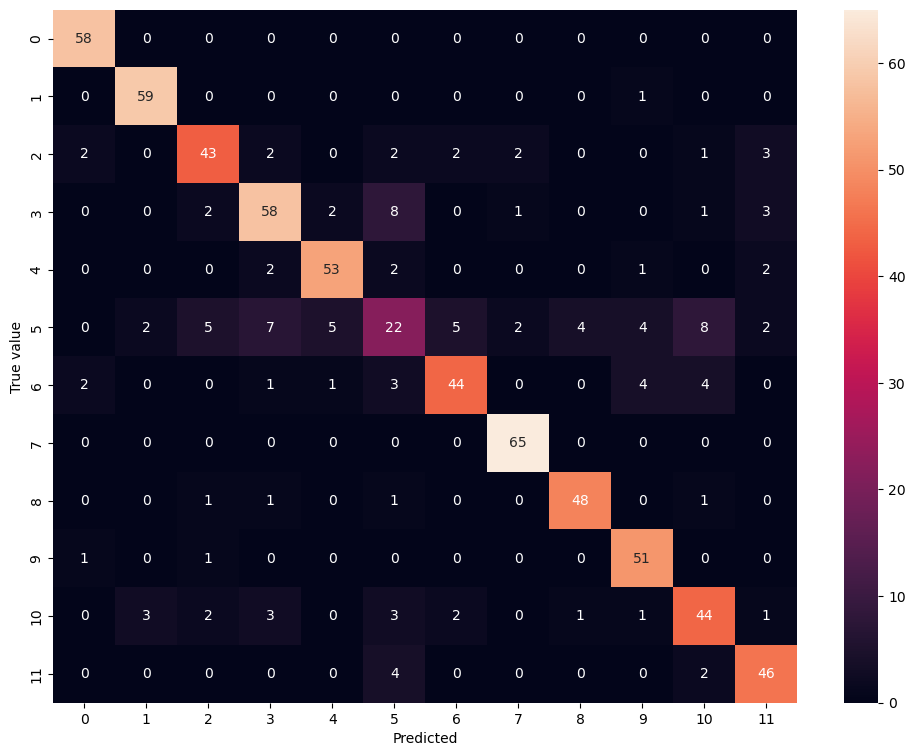

In [31]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (10,5) & (3,5) with 8,8 incorrect classifications represents how schizophrenia & behavioural with depressive disorders were misclassified often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [32]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        58
           2       0.92      0.98      0.95        60
           3       0.80      0.75      0.77        57
           4       0.78      0.77      0.78        75
           5       0.87      0.88      0.88        60
           6       0.49      0.33      0.40        66
           7       0.83      0.75      0.79        59
           8       0.93      1.00      0.96        65
           9       0.91      0.92      0.91        52
          10       0.82      0.96      0.89        53
          11       0.72      0.73      0.73        60
          12       0.81      0.88      0.84        52

    accuracy                           0.82       717
   macro avg       0.82      0.83      0.82       717
weighted avg       0.81      0.82      0.82       717



In [33]:
import shap
import numpy as np
from catboost import Pool

# Variable below uses SHAP API to find feature importance of Catboost model.
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

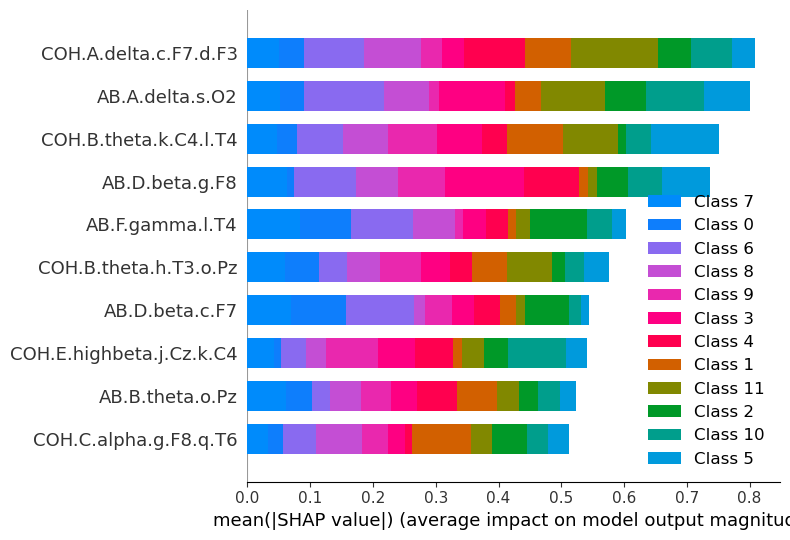

In [34]:
# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, max_display = 10)


In [35]:
# Variable below stores the values with a standard deviation of 0
vals = np.abs(shap_values).mean(0)

# Below the feature importance variable stores a data frame that takes all the features used to train the model
# and then sorts those values based on the feature importance with the most important at the top.
feature_importance = pd.DataFrame(list(zip(X_train.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)

# Printing an observation of the features and their importance in the model
feature_importance

,col_name,feature_importance_vals
149,COH.A.delta.c.F7.d.F3,48.271338
18,AB.A.delta.s.O2,47.868372
420,COH.B.theta.k.C4.l.T4,44.924636
63,AB.D.beta.g.F8,43.985122
106,AB.F.gamma.l.T4,36.044652
...,...,...
876,COH.E.highbeta.e.Fz.r.O1,0.084982
1038,COH.F.gamma.e.Fz.i.C3,0.082561
1106,COH.F.gamma.k.C4.n.P3,0.080844
982,COH.F.gamma.a.FP1.o.Pz,0.061881


In [36]:
# Below I am retrieving the 10 most important features to the model to try improve
# model accuracy by ignorning redundant / non impactful features.

selectedFeaturesColumns = feature_importance.head(10)

selectedFeatureColumnsNames = selectedFeaturesColumns['col_name'].tolist()

# Printing an observation of the features and their importance in the model
selectedFeatureColumnsNames

['COH.A.delta.c.F7.d.F3',
 'AB.A.delta.s.O2',
 'COH.B.theta.k.C4.l.T4',
 'AB.D.beta.g.F8',
 'AB.F.gamma.l.T4',
 'COH.B.theta.h.T3.o.Pz',
 'AB.D.beta.c.F7',
 'COH.E.highbeta.j.Cz.k.C4',
 'AB.B.theta.o.Pz',
 'COH.C.alpha.g.F8.q.T6']

In [37]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithTopFeaturesOnly = eegTrainingDataWithOutDisorder.reindex(columns = selectedFeatureColumnsNames)
eegTrainingDataWithTopFeaturesOnly

,COH.A.delta.c.F7.d.F3,AB.A.delta.s.O2,COH.B.theta.k.C4.l.T4,AB.D.beta.g.F8,AB.F.gamma.l.T4,COH.B.theta.h.T3.o.Pz,AB.D.beta.c.F7,COH.E.highbeta.j.Cz.k.C4,AB.B.theta.o.Pz,COH.C.alpha.g.F8.q.T6
0,45.796155,11.893948,49.913305,14.294143,11.331295,2.640911,11.452134,60.543654,14.208286,19.540393
1,62.110579,12.055957,61.908412,15.926999,3.312587,25.632945,12.536293,59.264629,10.562447,16.509707
2,75.399576,10.161765,51.598336,8.722198,2.455580,6.555170,11.673961,61.653367,56.294161,6.964353
3,37.362002,25.769522,64.211776,28.274453,5.500365,23.495366,25.867023,49.512856,34.922198,21.524375
4,38.050567,12.834485,39.764975,4.123758,1.037920,7.822940,3.982952,73.550347,10.437202,22.738287
...,...,...,...,...,...,...,...,...,...,...
940,28.221600,12.487389,64.677794,12.051789,1.726266,82.552998,13.891862,65.069419,8.063152,19.094883
941,81.895359,14.148625,74.297350,7.464615,1.692851,58.298535,5.163705,80.924023,8.708960,24.969558
942,99.881837,11.993932,49.313945,5.342358,0.805843,19.398574,5.021957,49.406909,9.983917,40.807412
943,67.284010,8.397872,72.423443,7.527330,1.371971,23.713608,7.033490,74.890895,10.888693,31.843191


In [38]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(eegTrainingDataWithTopFeaturesOnly, eegDatasetCleaned['specific.disorder'], test_size=0.3, random_state=42)

In [39]:
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=5000,
                           learning_rate=0.1,
                           depth=6,
                          min_data_in_leaf=13)

In [40]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

0:	learn: 2.4530087	total: 34.8ms	remaining: 2m 54s
1:	learn: 2.4215623	total: 69.4ms	remaining: 2m 53s
2:	learn: 2.3912381	total: 103ms	remaining: 2m 51s
3:	learn: 2.3601455	total: 137ms	remaining: 2m 50s
4:	learn: 2.3336420	total: 170ms	remaining: 2m 50s
5:	learn: 2.3075689	total: 204ms	remaining: 2m 49s
6:	learn: 2.2802656	total: 238ms	remaining: 2m 49s
7:	learn: 2.2546792	total: 272ms	remaining: 2m 49s
8:	learn: 2.2279599	total: 305ms	remaining: 2m 49s
9:	learn: 2.2069654	total: 339ms	remaining: 2m 49s
10:	learn: 2.1876313	total: 374ms	remaining: 2m 49s
11:	learn: 2.1694302	total: 407ms	remaining: 2m 49s
12:	learn: 2.1465744	total: 441ms	remaining: 2m 49s
13:	learn: 2.1318738	total: 475ms	remaining: 2m 49s
14:	learn: 2.1167834	total: 510ms	remaining: 2m 49s
15:	learn: 2.0942734	total: 543ms	remaining: 2m 49s
16:	learn: 2.0801081	total: 577ms	remaining: 2m 49s
17:	learn: 2.0593370	total: 611ms	remaining: 2m 49s
18:	learn: 2.0421713	total: 645ms	remaining: 2m 48s
19:	learn: 2.0280345

162:	learn: 0.9434063	total: 5.53s	remaining: 2m 44s
163:	learn: 0.9399759	total: 5.57s	remaining: 2m 44s
164:	learn: 0.9372918	total: 5.6s	remaining: 2m 44s
165:	learn: 0.9327927	total: 5.64s	remaining: 2m 44s
166:	learn: 0.9284135	total: 5.67s	remaining: 2m 44s
167:	learn: 0.9232601	total: 5.7s	remaining: 2m 44s
168:	learn: 0.9184544	total: 5.74s	remaining: 2m 44s
169:	learn: 0.9135324	total: 5.77s	remaining: 2m 44s
170:	learn: 0.9093993	total: 5.81s	remaining: 2m 43s
171:	learn: 0.9064011	total: 5.84s	remaining: 2m 43s
172:	learn: 0.9031021	total: 5.88s	remaining: 2m 43s
173:	learn: 0.8977176	total: 5.91s	remaining: 2m 43s
174:	learn: 0.8941923	total: 5.94s	remaining: 2m 43s
175:	learn: 0.8915672	total: 5.98s	remaining: 2m 43s
176:	learn: 0.8872505	total: 6.01s	remaining: 2m 43s
177:	learn: 0.8830753	total: 6.05s	remaining: 2m 43s
178:	learn: 0.8799630	total: 6.08s	remaining: 2m 43s
179:	learn: 0.8766685	total: 6.12s	remaining: 2m 43s
180:	learn: 0.8729670	total: 6.15s	remaining: 2m

318:	learn: 0.4880900	total: 10.9s	remaining: 2m 39s
319:	learn: 0.4862665	total: 10.9s	remaining: 2m 39s
320:	learn: 0.4850013	total: 10.9s	remaining: 2m 39s
321:	learn: 0.4832300	total: 11s	remaining: 2m 39s
322:	learn: 0.4824545	total: 11s	remaining: 2m 39s
323:	learn: 0.4799832	total: 11s	remaining: 2m 39s
324:	learn: 0.4784617	total: 11.1s	remaining: 2m 39s
325:	learn: 0.4763155	total: 11.1s	remaining: 2m 39s
326:	learn: 0.4752953	total: 11.2s	remaining: 2m 39s
327:	learn: 0.4739107	total: 11.2s	remaining: 2m 39s
328:	learn: 0.4716284	total: 11.2s	remaining: 2m 39s
329:	learn: 0.4695963	total: 11.3s	remaining: 2m 39s
330:	learn: 0.4678141	total: 11.3s	remaining: 2m 39s
331:	learn: 0.4657435	total: 11.3s	remaining: 2m 39s
332:	learn: 0.4633794	total: 11.4s	remaining: 2m 39s
333:	learn: 0.4618218	total: 11.4s	remaining: 2m 39s
334:	learn: 0.4604003	total: 11.4s	remaining: 2m 39s
335:	learn: 0.4579791	total: 11.5s	remaining: 2m 39s
336:	learn: 0.4560388	total: 11.5s	remaining: 2m 39s

474:	learn: 0.2937589	total: 16.2s	remaining: 2m 34s
475:	learn: 0.2925952	total: 16.3s	remaining: 2m 34s
476:	learn: 0.2912543	total: 16.3s	remaining: 2m 34s
477:	learn: 0.2905613	total: 16.3s	remaining: 2m 34s
478:	learn: 0.2899039	total: 16.4s	remaining: 2m 34s
479:	learn: 0.2893744	total: 16.4s	remaining: 2m 34s
480:	learn: 0.2883931	total: 16.4s	remaining: 2m 34s
481:	learn: 0.2877020	total: 16.5s	remaining: 2m 34s
482:	learn: 0.2869367	total: 16.5s	remaining: 2m 34s
483:	learn: 0.2864661	total: 16.5s	remaining: 2m 34s
484:	learn: 0.2857869	total: 16.6s	remaining: 2m 34s
485:	learn: 0.2851265	total: 16.6s	remaining: 2m 34s
486:	learn: 0.2836161	total: 16.6s	remaining: 2m 34s
487:	learn: 0.2826462	total: 16.7s	remaining: 2m 34s
488:	learn: 0.2821725	total: 16.7s	remaining: 2m 34s
489:	learn: 0.2815800	total: 16.7s	remaining: 2m 34s
490:	learn: 0.2809081	total: 16.8s	remaining: 2m 34s
491:	learn: 0.2800627	total: 16.8s	remaining: 2m 33s
492:	learn: 0.2793085	total: 16.8s	remaining: 

630:	learn: 0.1935234	total: 21.6s	remaining: 2m 29s
631:	learn: 0.1931159	total: 21.6s	remaining: 2m 29s
632:	learn: 0.1926386	total: 21.6s	remaining: 2m 29s
633:	learn: 0.1922065	total: 21.7s	remaining: 2m 29s
634:	learn: 0.1918422	total: 21.7s	remaining: 2m 29s
635:	learn: 0.1916233	total: 21.7s	remaining: 2m 29s
636:	learn: 0.1911833	total: 21.8s	remaining: 2m 29s
637:	learn: 0.1907302	total: 21.8s	remaining: 2m 29s
638:	learn: 0.1902104	total: 21.8s	remaining: 2m 29s
639:	learn: 0.1896710	total: 21.9s	remaining: 2m 28s
640:	learn: 0.1892279	total: 21.9s	remaining: 2m 28s
641:	learn: 0.1888668	total: 21.9s	remaining: 2m 28s
642:	learn: 0.1884508	total: 22s	remaining: 2m 28s
643:	learn: 0.1880789	total: 22s	remaining: 2m 28s
644:	learn: 0.1877086	total: 22s	remaining: 2m 28s
645:	learn: 0.1872537	total: 22.1s	remaining: 2m 28s
646:	learn: 0.1869550	total: 22.1s	remaining: 2m 28s
647:	learn: 0.1865113	total: 22.1s	remaining: 2m 28s
648:	learn: 0.1859435	total: 22.2s	remaining: 2m 28s

786:	learn: 0.1390430	total: 26.9s	remaining: 2m 24s
787:	learn: 0.1388094	total: 26.9s	remaining: 2m 24s
788:	learn: 0.1385691	total: 27s	remaining: 2m 23s
789:	learn: 0.1382636	total: 27s	remaining: 2m 23s
790:	learn: 0.1379212	total: 27s	remaining: 2m 23s
791:	learn: 0.1375967	total: 27.1s	remaining: 2m 23s
792:	learn: 0.1373947	total: 27.1s	remaining: 2m 23s
793:	learn: 0.1370915	total: 27.1s	remaining: 2m 23s
794:	learn: 0.1368994	total: 27.2s	remaining: 2m 23s
795:	learn: 0.1366898	total: 27.2s	remaining: 2m 23s
796:	learn: 0.1364241	total: 27.3s	remaining: 2m 23s
797:	learn: 0.1361222	total: 27.3s	remaining: 2m 23s
798:	learn: 0.1358137	total: 27.3s	remaining: 2m 23s
799:	learn: 0.1355161	total: 27.4s	remaining: 2m 23s
800:	learn: 0.1353426	total: 27.4s	remaining: 2m 23s
801:	learn: 0.1350417	total: 27.4s	remaining: 2m 23s
802:	learn: 0.1348512	total: 27.5s	remaining: 2m 23s
803:	learn: 0.1344204	total: 27.5s	remaining: 2m 23s
804:	learn: 0.1341834	total: 27.5s	remaining: 2m 23s

942:	learn: 0.1068969	total: 32.2s	remaining: 2m 18s
943:	learn: 0.1067279	total: 32.3s	remaining: 2m 18s
944:	learn: 0.1065702	total: 32.3s	remaining: 2m 18s
945:	learn: 0.1064233	total: 32.3s	remaining: 2m 18s
946:	learn: 0.1062179	total: 32.4s	remaining: 2m 18s
947:	learn: 0.1060617	total: 32.4s	remaining: 2m 18s
948:	learn: 0.1058814	total: 32.5s	remaining: 2m 18s
949:	learn: 0.1056799	total: 32.5s	remaining: 2m 18s
950:	learn: 0.1055174	total: 32.5s	remaining: 2m 18s
951:	learn: 0.1053331	total: 32.6s	remaining: 2m 18s
952:	learn: 0.1051234	total: 32.6s	remaining: 2m 18s
953:	learn: 0.1049155	total: 32.6s	remaining: 2m 18s
954:	learn: 0.1047520	total: 32.7s	remaining: 2m 18s
955:	learn: 0.1045915	total: 32.7s	remaining: 2m 18s
956:	learn: 0.1044296	total: 32.7s	remaining: 2m 18s
957:	learn: 0.1042407	total: 32.8s	remaining: 2m 18s
958:	learn: 0.1039740	total: 32.8s	remaining: 2m 18s
959:	learn: 0.1038365	total: 32.8s	remaining: 2m 18s
960:	learn: 0.1036219	total: 32.9s	remaining: 

1098:	learn: 0.0852853	total: 37.6s	remaining: 2m 13s
1099:	learn: 0.0852271	total: 37.6s	remaining: 2m 13s
1100:	learn: 0.0851074	total: 37.7s	remaining: 2m 13s
1101:	learn: 0.0850107	total: 37.7s	remaining: 2m 13s
1102:	learn: 0.0848797	total: 37.7s	remaining: 2m 13s
1103:	learn: 0.0847778	total: 37.8s	remaining: 2m 13s
1104:	learn: 0.0846368	total: 37.8s	remaining: 2m 13s
1105:	learn: 0.0845036	total: 37.8s	remaining: 2m 13s
1106:	learn: 0.0843616	total: 37.9s	remaining: 2m 13s
1107:	learn: 0.0842522	total: 37.9s	remaining: 2m 13s
1108:	learn: 0.0841627	total: 37.9s	remaining: 2m 13s
1109:	learn: 0.0840723	total: 38s	remaining: 2m 13s
1110:	learn: 0.0839443	total: 38s	remaining: 2m 13s
1111:	learn: 0.0838318	total: 38s	remaining: 2m 12s
1112:	learn: 0.0837207	total: 38.1s	remaining: 2m 12s
1113:	learn: 0.0836306	total: 38.1s	remaining: 2m 12s
1114:	learn: 0.0835367	total: 38.1s	remaining: 2m 12s
1115:	learn: 0.0834429	total: 38.2s	remaining: 2m 12s
1116:	learn: 0.0833619	total: 38.2

1253:	learn: 0.0710460	total: 46s	remaining: 2m 17s
1254:	learn: 0.0709478	total: 46.1s	remaining: 2m 17s
1255:	learn: 0.0708669	total: 46.2s	remaining: 2m 17s
1256:	learn: 0.0708079	total: 46.3s	remaining: 2m 17s
1257:	learn: 0.0707317	total: 46.4s	remaining: 2m 17s
1258:	learn: 0.0706476	total: 46.4s	remaining: 2m 17s
1259:	learn: 0.0705784	total: 46.5s	remaining: 2m 18s
1260:	learn: 0.0705044	total: 46.6s	remaining: 2m 18s
1261:	learn: 0.0704680	total: 46.7s	remaining: 2m 18s
1262:	learn: 0.0703766	total: 46.8s	remaining: 2m 18s
1263:	learn: 0.0702825	total: 46.8s	remaining: 2m 18s
1264:	learn: 0.0701825	total: 46.9s	remaining: 2m 18s
1265:	learn: 0.0701042	total: 47s	remaining: 2m 18s
1266:	learn: 0.0700470	total: 47.1s	remaining: 2m 18s
1267:	learn: 0.0699659	total: 47.2s	remaining: 2m 18s
1268:	learn: 0.0698938	total: 47.2s	remaining: 2m 18s
1269:	learn: 0.0698101	total: 47.3s	remaining: 2m 19s
1270:	learn: 0.0697572	total: 47.4s	remaining: 2m 19s
1271:	learn: 0.0696639	total: 47

1407:	learn: 0.0603430	total: 52.8s	remaining: 2m 14s
1408:	learn: 0.0603015	total: 52.8s	remaining: 2m 14s
1409:	learn: 0.0602270	total: 52.9s	remaining: 2m 14s
1410:	learn: 0.0601522	total: 52.9s	remaining: 2m 14s
1411:	learn: 0.0600790	total: 52.9s	remaining: 2m 14s
1412:	learn: 0.0600088	total: 53s	remaining: 2m 14s
1413:	learn: 0.0599492	total: 53s	remaining: 2m 14s
1414:	learn: 0.0598841	total: 53s	remaining: 2m 14s
1415:	learn: 0.0598354	total: 53.1s	remaining: 2m 14s
1416:	learn: 0.0597913	total: 53.1s	remaining: 2m 14s
1417:	learn: 0.0597477	total: 53.1s	remaining: 2m 14s
1418:	learn: 0.0596951	total: 53.2s	remaining: 2m 14s
1419:	learn: 0.0596278	total: 53.2s	remaining: 2m 14s
1420:	learn: 0.0595709	total: 53.3s	remaining: 2m 14s
1421:	learn: 0.0595005	total: 53.3s	remaining: 2m 14s
1422:	learn: 0.0594261	total: 53.3s	remaining: 2m 14s
1423:	learn: 0.0593739	total: 53.4s	remaining: 2m 13s
1424:	learn: 0.0593254	total: 53.4s	remaining: 2m 13s
1425:	learn: 0.0592889	total: 53.4

1563:	learn: 0.0523349	total: 58.1s	remaining: 2m 7s
1564:	learn: 0.0522813	total: 58.2s	remaining: 2m 7s
1565:	learn: 0.0522353	total: 58.2s	remaining: 2m 7s
1566:	learn: 0.0521819	total: 58.2s	remaining: 2m 7s
1567:	learn: 0.0521286	total: 58.3s	remaining: 2m 7s
1568:	learn: 0.0520809	total: 58.3s	remaining: 2m 7s
1569:	learn: 0.0520355	total: 58.4s	remaining: 2m 7s
1570:	learn: 0.0519845	total: 58.4s	remaining: 2m 7s
1571:	learn: 0.0519452	total: 58.4s	remaining: 2m 7s
1572:	learn: 0.0518862	total: 58.5s	remaining: 2m 7s
1573:	learn: 0.0518595	total: 58.5s	remaining: 2m 7s
1574:	learn: 0.0518085	total: 58.5s	remaining: 2m 7s
1575:	learn: 0.0517427	total: 58.6s	remaining: 2m 7s
1576:	learn: 0.0516806	total: 58.6s	remaining: 2m 7s
1577:	learn: 0.0516236	total: 58.6s	remaining: 2m 7s
1578:	learn: 0.0515751	total: 58.7s	remaining: 2m 7s
1579:	learn: 0.0515325	total: 58.7s	remaining: 2m 7s
1580:	learn: 0.0514877	total: 58.7s	remaining: 2m 6s
1581:	learn: 0.0514395	total: 58.8s	remaining:

1725:	learn: 0.0456932	total: 1m 3s	remaining: 2m
1726:	learn: 0.0456571	total: 1m 3s	remaining: 2m
1727:	learn: 0.0456246	total: 1m 3s	remaining: 2m
1728:	learn: 0.0455947	total: 1m 3s	remaining: 2m
1729:	learn: 0.0455810	total: 1m 3s	remaining: 2m
1730:	learn: 0.0455437	total: 1m 3s	remaining: 2m
1731:	learn: 0.0454908	total: 1m 3s	remaining: 2m
1732:	learn: 0.0454603	total: 1m 3s	remaining: 2m
1733:	learn: 0.0454200	total: 1m 3s	remaining: 2m
1734:	learn: 0.0453799	total: 1m 4s	remaining: 2m
1735:	learn: 0.0453572	total: 1m 4s	remaining: 2m
1736:	learn: 0.0453145	total: 1m 4s	remaining: 2m
1737:	learn: 0.0452778	total: 1m 4s	remaining: 2m
1738:	learn: 0.0452561	total: 1m 4s	remaining: 2m
1739:	learn: 0.0452156	total: 1m 4s	remaining: 2m
1740:	learn: 0.0451794	total: 1m 4s	remaining: 2m
1741:	learn: 0.0451388	total: 1m 4s	remaining: 2m
1742:	learn: 0.0451023	total: 1m 4s	remaining: 2m
1743:	learn: 0.0450776	total: 1m 4s	remaining: 2m
1744:	learn: 0.0450323	total: 1m 4s	remaining: 2m


1881:	learn: 0.0407997	total: 1m 9s	remaining: 1m 54s
1882:	learn: 0.0407778	total: 1m 9s	remaining: 1m 54s
1883:	learn: 0.0407416	total: 1m 9s	remaining: 1m 54s
1884:	learn: 0.0407187	total: 1m 9s	remaining: 1m 54s
1885:	learn: 0.0406877	total: 1m 9s	remaining: 1m 54s
1886:	learn: 0.0406602	total: 1m 9s	remaining: 1m 54s
1887:	learn: 0.0406323	total: 1m 9s	remaining: 1m 54s
1888:	learn: 0.0405997	total: 1m 9s	remaining: 1m 54s
1889:	learn: 0.0405805	total: 1m 9s	remaining: 1m 54s
1890:	learn: 0.0405494	total: 1m 9s	remaining: 1m 54s
1891:	learn: 0.0405190	total: 1m 9s	remaining: 1m 53s
1892:	learn: 0.0404896	total: 1m 9s	remaining: 1m 53s
1893:	learn: 0.0404569	total: 1m 9s	remaining: 1m 53s
1894:	learn: 0.0404300	total: 1m 9s	remaining: 1m 53s
1895:	learn: 0.0404055	total: 1m 9s	remaining: 1m 53s
1896:	learn: 0.0403776	total: 1m 9s	remaining: 1m 53s
1897:	learn: 0.0403406	total: 1m 9s	remaining: 1m 53s
1898:	learn: 0.0403233	total: 1m 9s	remaining: 1m 53s
1899:	learn: 0.0402884	total

2031:	learn: 0.0368430	total: 1m 14s	remaining: 1m 48s
2032:	learn: 0.0368087	total: 1m 14s	remaining: 1m 48s
2033:	learn: 0.0367816	total: 1m 14s	remaining: 1m 48s
2034:	learn: 0.0367563	total: 1m 14s	remaining: 1m 48s
2035:	learn: 0.0367348	total: 1m 14s	remaining: 1m 48s
2036:	learn: 0.0367038	total: 1m 14s	remaining: 1m 48s
2037:	learn: 0.0366781	total: 1m 14s	remaining: 1m 48s
2038:	learn: 0.0366469	total: 1m 14s	remaining: 1m 48s
2039:	learn: 0.0366265	total: 1m 14s	remaining: 1m 48s
2040:	learn: 0.0365918	total: 1m 14s	remaining: 1m 47s
2041:	learn: 0.0365583	total: 1m 14s	remaining: 1m 47s
2042:	learn: 0.0365312	total: 1m 14s	remaining: 1m 47s
2043:	learn: 0.0365056	total: 1m 14s	remaining: 1m 47s
2044:	learn: 0.0364768	total: 1m 14s	remaining: 1m 47s
2045:	learn: 0.0364546	total: 1m 14s	remaining: 1m 47s
2046:	learn: 0.0364326	total: 1m 14s	remaining: 1m 47s
2047:	learn: 0.0364080	total: 1m 14s	remaining: 1m 47s
2048:	learn: 0.0363778	total: 1m 14s	remaining: 1m 47s
2049:	lear

2181:	learn: 0.0335750	total: 1m 19s	remaining: 1m 42s
2182:	learn: 0.0335507	total: 1m 19s	remaining: 1m 42s
2183:	learn: 0.0335296	total: 1m 19s	remaining: 1m 42s
2184:	learn: 0.0335124	total: 1m 19s	remaining: 1m 42s
2185:	learn: 0.0335026	total: 1m 19s	remaining: 1m 42s
2186:	learn: 0.0334830	total: 1m 19s	remaining: 1m 42s
2187:	learn: 0.0334683	total: 1m 19s	remaining: 1m 42s
2188:	learn: 0.0334396	total: 1m 19s	remaining: 1m 42s
2189:	learn: 0.0334207	total: 1m 19s	remaining: 1m 42s
2190:	learn: 0.0334010	total: 1m 19s	remaining: 1m 42s
2191:	learn: 0.0333875	total: 1m 19s	remaining: 1m 42s
2192:	learn: 0.0333653	total: 1m 19s	remaining: 1m 42s
2193:	learn: 0.0333468	total: 1m 19s	remaining: 1m 41s
2194:	learn: 0.0333282	total: 1m 19s	remaining: 1m 41s
2195:	learn: 0.0333098	total: 1m 19s	remaining: 1m 41s
2196:	learn: 0.0332878	total: 1m 19s	remaining: 1m 41s
2197:	learn: 0.0332772	total: 1m 19s	remaining: 1m 41s
2198:	learn: 0.0332525	total: 1m 19s	remaining: 1m 41s
2199:	lear

2331:	learn: 0.0308544	total: 1m 24s	remaining: 1m 36s
2332:	learn: 0.0308315	total: 1m 24s	remaining: 1m 36s
2333:	learn: 0.0308125	total: 1m 24s	remaining: 1m 36s
2334:	learn: 0.0308023	total: 1m 24s	remaining: 1m 36s
2335:	learn: 0.0307790	total: 1m 24s	remaining: 1m 36s
2336:	learn: 0.0307676	total: 1m 24s	remaining: 1m 36s
2337:	learn: 0.0307552	total: 1m 24s	remaining: 1m 36s
2338:	learn: 0.0307390	total: 1m 24s	remaining: 1m 36s
2339:	learn: 0.0307226	total: 1m 24s	remaining: 1m 36s
2340:	learn: 0.0307035	total: 1m 24s	remaining: 1m 36s
2341:	learn: 0.0306883	total: 1m 24s	remaining: 1m 36s
2342:	learn: 0.0306674	total: 1m 24s	remaining: 1m 36s
2343:	learn: 0.0306517	total: 1m 24s	remaining: 1m 36s
2344:	learn: 0.0306380	total: 1m 24s	remaining: 1m 36s
2345:	learn: 0.0306167	total: 1m 24s	remaining: 1m 36s
2346:	learn: 0.0305968	total: 1m 24s	remaining: 1m 36s
2347:	learn: 0.0305778	total: 1m 24s	remaining: 1m 35s
2348:	learn: 0.0305657	total: 1m 25s	remaining: 1m 35s
2349:	lear

2481:	learn: 0.0285358	total: 1m 30s	remaining: 1m 31s
2482:	learn: 0.0285285	total: 1m 30s	remaining: 1m 32s
2483:	learn: 0.0285150	total: 1m 30s	remaining: 1m 32s
2484:	learn: 0.0285026	total: 1m 30s	remaining: 1m 32s
2485:	learn: 0.0284827	total: 1m 31s	remaining: 1m 32s
2486:	learn: 0.0284693	total: 1m 31s	remaining: 1m 32s
2487:	learn: 0.0284596	total: 1m 31s	remaining: 1m 32s
2488:	learn: 0.0284400	total: 1m 31s	remaining: 1m 32s
2489:	learn: 0.0284281	total: 1m 31s	remaining: 1m 32s
2490:	learn: 0.0284026	total: 1m 31s	remaining: 1m 32s
2491:	learn: 0.0283830	total: 1m 31s	remaining: 1m 32s
2492:	learn: 0.0283639	total: 1m 31s	remaining: 1m 32s
2493:	learn: 0.0283464	total: 1m 31s	remaining: 1m 32s
2494:	learn: 0.0283323	total: 1m 31s	remaining: 1m 32s
2495:	learn: 0.0283194	total: 1m 31s	remaining: 1m 32s
2496:	learn: 0.0283087	total: 1m 31s	remaining: 1m 32s
2497:	learn: 0.0282917	total: 1m 31s	remaining: 1m 32s
2498:	learn: 0.0282795	total: 1m 32s	remaining: 1m 32s
2499:	lear

2633:	learn: 0.0264241	total: 1m 39s	remaining: 1m 29s
2634:	learn: 0.0264153	total: 1m 39s	remaining: 1m 29s
2635:	learn: 0.0264071	total: 1m 39s	remaining: 1m 29s
2636:	learn: 0.0264015	total: 1m 39s	remaining: 1m 29s
2637:	learn: 0.0263911	total: 1m 39s	remaining: 1m 29s
2638:	learn: 0.0263743	total: 1m 39s	remaining: 1m 29s
2639:	learn: 0.0263569	total: 1m 39s	remaining: 1m 29s
2640:	learn: 0.0263418	total: 1m 39s	remaining: 1m 29s
2641:	learn: 0.0263306	total: 1m 39s	remaining: 1m 29s
2642:	learn: 0.0263180	total: 1m 39s	remaining: 1m 28s
2643:	learn: 0.0263019	total: 1m 39s	remaining: 1m 28s
2644:	learn: 0.0262857	total: 1m 39s	remaining: 1m 28s
2645:	learn: 0.0262698	total: 1m 39s	remaining: 1m 28s
2646:	learn: 0.0262607	total: 1m 39s	remaining: 1m 28s
2647:	learn: 0.0262451	total: 1m 39s	remaining: 1m 28s
2648:	learn: 0.0262365	total: 1m 39s	remaining: 1m 28s
2649:	learn: 0.0262265	total: 1m 39s	remaining: 1m 28s
2650:	learn: 0.0262151	total: 1m 40s	remaining: 1m 28s
2651:	lear

2783:	learn: 0.0246670	total: 1m 44s	remaining: 1m 23s
2784:	learn: 0.0246562	total: 1m 44s	remaining: 1m 23s
2785:	learn: 0.0246455	total: 1m 44s	remaining: 1m 23s
2786:	learn: 0.0246374	total: 1m 44s	remaining: 1m 23s
2787:	learn: 0.0246246	total: 1m 44s	remaining: 1m 23s
2788:	learn: 0.0246122	total: 1m 44s	remaining: 1m 23s
2789:	learn: 0.0245986	total: 1m 44s	remaining: 1m 22s
2790:	learn: 0.0245858	total: 1m 44s	remaining: 1m 22s
2791:	learn: 0.0245781	total: 1m 44s	remaining: 1m 22s
2792:	learn: 0.0245689	total: 1m 44s	remaining: 1m 22s
2793:	learn: 0.0245554	total: 1m 44s	remaining: 1m 22s
2794:	learn: 0.0245441	total: 1m 44s	remaining: 1m 22s
2795:	learn: 0.0245292	total: 1m 44s	remaining: 1m 22s
2796:	learn: 0.0245176	total: 1m 44s	remaining: 1m 22s
2797:	learn: 0.0245078	total: 1m 45s	remaining: 1m 22s
2798:	learn: 0.0244951	total: 1m 45s	remaining: 1m 22s
2799:	learn: 0.0244882	total: 1m 45s	remaining: 1m 22s
2800:	learn: 0.0244777	total: 1m 45s	remaining: 1m 22s
2801:	lear

2933:	learn: 0.0231231	total: 1m 49s	remaining: 1m 17s
2934:	learn: 0.0231121	total: 1m 49s	remaining: 1m 17s
2935:	learn: 0.0230998	total: 1m 49s	remaining: 1m 17s
2936:	learn: 0.0230885	total: 1m 49s	remaining: 1m 17s
2937:	learn: 0.0230744	total: 1m 49s	remaining: 1m 17s
2938:	learn: 0.0230632	total: 1m 49s	remaining: 1m 16s
2939:	learn: 0.0230520	total: 1m 49s	remaining: 1m 16s
2940:	learn: 0.0230402	total: 1m 49s	remaining: 1m 16s
2941:	learn: 0.0230278	total: 1m 49s	remaining: 1m 16s
2942:	learn: 0.0230221	total: 1m 49s	remaining: 1m 16s
2943:	learn: 0.0230117	total: 1m 49s	remaining: 1m 16s
2944:	learn: 0.0230040	total: 1m 49s	remaining: 1m 16s
2945:	learn: 0.0229904	total: 1m 50s	remaining: 1m 16s
2946:	learn: 0.0229818	total: 1m 50s	remaining: 1m 16s
2947:	learn: 0.0229720	total: 1m 50s	remaining: 1m 16s
2948:	learn: 0.0229611	total: 1m 50s	remaining: 1m 16s
2949:	learn: 0.0229511	total: 1m 50s	remaining: 1m 16s
2950:	learn: 0.0229438	total: 1m 50s	remaining: 1m 16s
2951:	lear

3083:	learn: 0.0217263	total: 1m 54s	remaining: 1m 11s
3084:	learn: 0.0217183	total: 1m 54s	remaining: 1m 11s
3085:	learn: 0.0217089	total: 1m 54s	remaining: 1m 11s
3086:	learn: 0.0216994	total: 1m 54s	remaining: 1m 11s
3087:	learn: 0.0216885	total: 1m 54s	remaining: 1m 11s
3088:	learn: 0.0216769	total: 1m 54s	remaining: 1m 11s
3089:	learn: 0.0216682	total: 1m 54s	remaining: 1m 11s
3090:	learn: 0.0216610	total: 1m 54s	remaining: 1m 11s
3091:	learn: 0.0216520	total: 1m 54s	remaining: 1m 10s
3092:	learn: 0.0216445	total: 1m 55s	remaining: 1m 10s
3093:	learn: 0.0216373	total: 1m 55s	remaining: 1m 10s
3094:	learn: 0.0216290	total: 1m 55s	remaining: 1m 10s
3095:	learn: 0.0216233	total: 1m 55s	remaining: 1m 10s
3096:	learn: 0.0216134	total: 1m 55s	remaining: 1m 10s
3097:	learn: 0.0216036	total: 1m 55s	remaining: 1m 10s
3098:	learn: 0.0215943	total: 1m 55s	remaining: 1m 10s
3099:	learn: 0.0215867	total: 1m 55s	remaining: 1m 10s
3100:	learn: 0.0215762	total: 1m 55s	remaining: 1m 10s
3101:	lear

3239:	learn: 0.0204629	total: 2m	remaining: 1m 5s
3240:	learn: 0.0204552	total: 2m	remaining: 1m 5s
3241:	learn: 0.0204485	total: 2m	remaining: 1m 5s
3242:	learn: 0.0204393	total: 2m	remaining: 1m 5s
3243:	learn: 0.0204316	total: 2m	remaining: 1m 5s
3244:	learn: 0.0204235	total: 2m	remaining: 1m 5s
3245:	learn: 0.0204136	total: 2m	remaining: 1m 4s
3246:	learn: 0.0204071	total: 2m	remaining: 1m 4s
3247:	learn: 0.0203995	total: 2m	remaining: 1m 4s
3248:	learn: 0.0203876	total: 2m	remaining: 1m 4s
3249:	learn: 0.0203768	total: 2m	remaining: 1m 4s
3250:	learn: 0.0203658	total: 2m	remaining: 1m 4s
3251:	learn: 0.0203550	total: 2m	remaining: 1m 4s
3252:	learn: 0.0203450	total: 2m	remaining: 1m 4s
3253:	learn: 0.0203334	total: 2m	remaining: 1m 4s
3254:	learn: 0.0203258	total: 2m	remaining: 1m 4s
3255:	learn: 0.0203179	total: 2m	remaining: 1m 4s
3256:	learn: 0.0203110	total: 2m	remaining: 1m 4s
3257:	learn: 0.0203016	total: 2m	remaining: 1m 4s
3258:	learn: 0.0202916	total: 2m	remaining: 1m 4s


3401:	learn: 0.0192468	total: 2m 5s	remaining: 59s
3402:	learn: 0.0192405	total: 2m 5s	remaining: 58.9s
3403:	learn: 0.0192335	total: 2m 5s	remaining: 58.9s
3404:	learn: 0.0192253	total: 2m 5s	remaining: 58.8s
3405:	learn: 0.0192170	total: 2m 5s	remaining: 58.8s
3406:	learn: 0.0192066	total: 2m 5s	remaining: 58.8s
3407:	learn: 0.0192026	total: 2m 5s	remaining: 58.7s
3408:	learn: 0.0191968	total: 2m 5s	remaining: 58.7s
3409:	learn: 0.0191918	total: 2m 5s	remaining: 58.7s
3410:	learn: 0.0191829	total: 2m 5s	remaining: 58.6s
3411:	learn: 0.0191758	total: 2m 5s	remaining: 58.6s
3412:	learn: 0.0191711	total: 2m 5s	remaining: 58.5s
3413:	learn: 0.0191645	total: 2m 5s	remaining: 58.5s
3414:	learn: 0.0191586	total: 2m 5s	remaining: 58.5s
3415:	learn: 0.0191529	total: 2m 5s	remaining: 58.4s
3416:	learn: 0.0191469	total: 2m 6s	remaining: 58.4s
3417:	learn: 0.0191402	total: 2m 6s	remaining: 58.3s
3418:	learn: 0.0191356	total: 2m 6s	remaining: 58.3s
3419:	learn: 0.0191300	total: 2m 6s	remaining: 5

3557:	learn: 0.0181847	total: 2m 10s	remaining: 53s
3558:	learn: 0.0181796	total: 2m 10s	remaining: 53s
3559:	learn: 0.0181737	total: 2m 10s	remaining: 53s
3560:	learn: 0.0181676	total: 2m 10s	remaining: 52.9s
3561:	learn: 0.0181596	total: 2m 10s	remaining: 52.9s
3562:	learn: 0.0181532	total: 2m 11s	remaining: 52.8s
3563:	learn: 0.0181487	total: 2m 11s	remaining: 52.8s
3564:	learn: 0.0181415	total: 2m 11s	remaining: 52.8s
3565:	learn: 0.0181350	total: 2m 11s	remaining: 52.7s
3566:	learn: 0.0181291	total: 2m 11s	remaining: 52.7s
3567:	learn: 0.0181207	total: 2m 11s	remaining: 52.6s
3568:	learn: 0.0181164	total: 2m 11s	remaining: 52.6s
3569:	learn: 0.0181098	total: 2m 11s	remaining: 52.6s
3570:	learn: 0.0181034	total: 2m 11s	remaining: 52.5s
3571:	learn: 0.0180976	total: 2m 11s	remaining: 52.5s
3572:	learn: 0.0180928	total: 2m 11s	remaining: 52.5s
3573:	learn: 0.0180846	total: 2m 11s	remaining: 52.4s
3574:	learn: 0.0180784	total: 2m 11s	remaining: 52.4s
3575:	learn: 0.0180713	total: 2m 1

3712:	learn: 0.0172815	total: 2m 17s	remaining: 47.8s
3713:	learn: 0.0172751	total: 2m 17s	remaining: 47.8s
3714:	learn: 0.0172697	total: 2m 18s	remaining: 47.8s
3715:	learn: 0.0172648	total: 2m 18s	remaining: 47.7s
3716:	learn: 0.0172608	total: 2m 18s	remaining: 47.7s
3717:	learn: 0.0172545	total: 2m 18s	remaining: 47.7s
3718:	learn: 0.0172498	total: 2m 18s	remaining: 47.7s
3719:	learn: 0.0172455	total: 2m 18s	remaining: 47.6s
3720:	learn: 0.0172376	total: 2m 18s	remaining: 47.6s
3721:	learn: 0.0172348	total: 2m 18s	remaining: 47.6s
3722:	learn: 0.0172300	total: 2m 18s	remaining: 47.6s
3723:	learn: 0.0172230	total: 2m 18s	remaining: 47.6s
3724:	learn: 0.0172164	total: 2m 18s	remaining: 47.5s
3725:	learn: 0.0172146	total: 2m 18s	remaining: 47.5s
3726:	learn: 0.0172091	total: 2m 19s	remaining: 47.5s
3727:	learn: 0.0172039	total: 2m 19s	remaining: 47.5s
3728:	learn: 0.0171989	total: 2m 19s	remaining: 47.4s
3729:	learn: 0.0171901	total: 2m 19s	remaining: 47.4s
3730:	learn: 0.0171836	total

3865:	learn: 0.0164511	total: 2m 26s	remaining: 42.9s
3866:	learn: 0.0164472	total: 2m 26s	remaining: 42.8s
3867:	learn: 0.0164416	total: 2m 26s	remaining: 42.8s
3868:	learn: 0.0164344	total: 2m 26s	remaining: 42.7s
3869:	learn: 0.0164295	total: 2m 26s	remaining: 42.7s
3870:	learn: 0.0164252	total: 2m 26s	remaining: 42.7s
3871:	learn: 0.0164212	total: 2m 26s	remaining: 42.6s
3872:	learn: 0.0164174	total: 2m 26s	remaining: 42.6s
3873:	learn: 0.0164126	total: 2m 26s	remaining: 42.5s
3874:	learn: 0.0164051	total: 2m 26s	remaining: 42.5s
3875:	learn: 0.0163986	total: 2m 26s	remaining: 42.5s
3876:	learn: 0.0163942	total: 2m 26s	remaining: 42.4s
3877:	learn: 0.0163890	total: 2m 26s	remaining: 42.4s
3878:	learn: 0.0163866	total: 2m 26s	remaining: 42.4s
3879:	learn: 0.0163802	total: 2m 26s	remaining: 42.3s
3880:	learn: 0.0163753	total: 2m 26s	remaining: 42.3s
3881:	learn: 0.0163706	total: 2m 26s	remaining: 42.2s
3882:	learn: 0.0163636	total: 2m 26s	remaining: 42.2s
3883:	learn: 0.0163600	total

4021:	learn: 0.0157102	total: 2m 31s	remaining: 36.8s
4022:	learn: 0.0157050	total: 2m 31s	remaining: 36.8s
4023:	learn: 0.0157005	total: 2m 31s	remaining: 36.7s
4024:	learn: 0.0156962	total: 2m 31s	remaining: 36.7s
4025:	learn: 0.0156897	total: 2m 31s	remaining: 36.7s
4026:	learn: 0.0156858	total: 2m 31s	remaining: 36.6s
4027:	learn: 0.0156795	total: 2m 31s	remaining: 36.6s
4028:	learn: 0.0156742	total: 2m 31s	remaining: 36.5s
4029:	learn: 0.0156683	total: 2m 31s	remaining: 36.5s
4030:	learn: 0.0156640	total: 2m 31s	remaining: 36.5s
4031:	learn: 0.0156622	total: 2m 31s	remaining: 36.4s
4032:	learn: 0.0156576	total: 2m 31s	remaining: 36.4s
4033:	learn: 0.0156522	total: 2m 31s	remaining: 36.4s
4034:	learn: 0.0156484	total: 2m 31s	remaining: 36.3s
4035:	learn: 0.0156446	total: 2m 31s	remaining: 36.3s
4036:	learn: 0.0156391	total: 2m 31s	remaining: 36.2s
4037:	learn: 0.0156331	total: 2m 31s	remaining: 36.2s
4038:	learn: 0.0156297	total: 2m 32s	remaining: 36.2s
4039:	learn: 0.0156239	total

4177:	learn: 0.0150001	total: 2m 36s	remaining: 30.8s
4178:	learn: 0.0149981	total: 2m 36s	remaining: 30.8s
4179:	learn: 0.0149929	total: 2m 36s	remaining: 30.8s
4180:	learn: 0.0149894	total: 2m 36s	remaining: 30.7s
4181:	learn: 0.0149847	total: 2m 36s	remaining: 30.7s
4182:	learn: 0.0149803	total: 2m 36s	remaining: 30.6s
4183:	learn: 0.0149746	total: 2m 36s	remaining: 30.6s
4184:	learn: 0.0149691	total: 2m 36s	remaining: 30.6s
4185:	learn: 0.0149640	total: 2m 37s	remaining: 30.5s
4186:	learn: 0.0149576	total: 2m 37s	remaining: 30.5s
4187:	learn: 0.0149547	total: 2m 37s	remaining: 30.5s
4188:	learn: 0.0149515	total: 2m 37s	remaining: 30.4s
4189:	learn: 0.0149464	total: 2m 37s	remaining: 30.4s
4190:	learn: 0.0149418	total: 2m 37s	remaining: 30.3s
4191:	learn: 0.0149380	total: 2m 37s	remaining: 30.3s
4192:	learn: 0.0149342	total: 2m 37s	remaining: 30.3s
4193:	learn: 0.0149286	total: 2m 37s	remaining: 30.2s
4194:	learn: 0.0149240	total: 2m 37s	remaining: 30.2s
4195:	learn: 0.0149206	total

4333:	learn: 0.0143670	total: 2m 42s	remaining: 24.9s
4334:	learn: 0.0143621	total: 2m 42s	remaining: 24.9s
4335:	learn: 0.0143577	total: 2m 42s	remaining: 24.8s
4336:	learn: 0.0143535	total: 2m 42s	remaining: 24.8s
4337:	learn: 0.0143483	total: 2m 42s	remaining: 24.8s
4338:	learn: 0.0143435	total: 2m 42s	remaining: 24.7s
4339:	learn: 0.0143403	total: 2m 42s	remaining: 24.7s
4340:	learn: 0.0143379	total: 2m 42s	remaining: 24.6s
4341:	learn: 0.0143340	total: 2m 42s	remaining: 24.6s
4342:	learn: 0.0143301	total: 2m 42s	remaining: 24.6s
4343:	learn: 0.0143268	total: 2m 42s	remaining: 24.5s
4344:	learn: 0.0143243	total: 2m 42s	remaining: 24.5s
4345:	learn: 0.0143200	total: 2m 42s	remaining: 24.5s
4346:	learn: 0.0143145	total: 2m 42s	remaining: 24.4s
4347:	learn: 0.0143096	total: 2m 42s	remaining: 24.4s
4348:	learn: 0.0143062	total: 2m 42s	remaining: 24.3s
4349:	learn: 0.0143039	total: 2m 42s	remaining: 24.3s
4350:	learn: 0.0143020	total: 2m 42s	remaining: 24.3s
4351:	learn: 0.0142982	total

4489:	learn: 0.0137907	total: 2m 47s	remaining: 19s
4490:	learn: 0.0137873	total: 2m 47s	remaining: 19s
4491:	learn: 0.0137825	total: 2m 47s	remaining: 18.9s
4492:	learn: 0.0137786	total: 2m 47s	remaining: 18.9s
4493:	learn: 0.0137759	total: 2m 47s	remaining: 18.9s
4494:	learn: 0.0137718	total: 2m 47s	remaining: 18.8s
4495:	learn: 0.0137667	total: 2m 47s	remaining: 18.8s
4496:	learn: 0.0137630	total: 2m 47s	remaining: 18.8s
4497:	learn: 0.0137586	total: 2m 47s	remaining: 18.7s
4498:	learn: 0.0137560	total: 2m 47s	remaining: 18.7s
4499:	learn: 0.0137525	total: 2m 47s	remaining: 18.6s
4500:	learn: 0.0137500	total: 2m 47s	remaining: 18.6s
4501:	learn: 0.0137475	total: 2m 47s	remaining: 18.6s
4502:	learn: 0.0137431	total: 2m 47s	remaining: 18.5s
4503:	learn: 0.0137408	total: 2m 47s	remaining: 18.5s
4504:	learn: 0.0137384	total: 2m 47s	remaining: 18.5s
4505:	learn: 0.0137345	total: 2m 47s	remaining: 18.4s
4506:	learn: 0.0137308	total: 2m 48s	remaining: 18.4s
4507:	learn: 0.0137256	total: 2m

4645:	learn: 0.0132514	total: 2m 52s	remaining: 13.2s
4646:	learn: 0.0132483	total: 2m 52s	remaining: 13.1s
4647:	learn: 0.0132445	total: 2m 52s	remaining: 13.1s
4648:	learn: 0.0132412	total: 2m 52s	remaining: 13.1s
4649:	learn: 0.0132395	total: 2m 53s	remaining: 13s
4650:	learn: 0.0132369	total: 2m 53s	remaining: 13s
4651:	learn: 0.0132344	total: 2m 53s	remaining: 12.9s
4652:	learn: 0.0132323	total: 2m 53s	remaining: 12.9s
4653:	learn: 0.0132299	total: 2m 53s	remaining: 12.9s
4654:	learn: 0.0132268	total: 2m 53s	remaining: 12.8s
4655:	learn: 0.0132251	total: 2m 53s	remaining: 12.8s
4656:	learn: 0.0132210	total: 2m 53s	remaining: 12.8s
4657:	learn: 0.0132190	total: 2m 53s	remaining: 12.7s
4658:	learn: 0.0132173	total: 2m 53s	remaining: 12.7s
4659:	learn: 0.0132138	total: 2m 53s	remaining: 12.6s
4660:	learn: 0.0132109	total: 2m 53s	remaining: 12.6s
4661:	learn: 0.0132086	total: 2m 53s	remaining: 12.6s
4662:	learn: 0.0132044	total: 2m 53s	remaining: 12.5s
4663:	learn: 0.0132017	total: 2m

4801:	learn: 0.0127514	total: 2m 58s	remaining: 7.35s
4802:	learn: 0.0127490	total: 2m 58s	remaining: 7.31s
4803:	learn: 0.0127458	total: 2m 58s	remaining: 7.28s
4804:	learn: 0.0127426	total: 2m 58s	remaining: 7.24s
4805:	learn: 0.0127382	total: 2m 58s	remaining: 7.2s
4806:	learn: 0.0127355	total: 2m 58s	remaining: 7.17s
4807:	learn: 0.0127327	total: 2m 58s	remaining: 7.13s
4808:	learn: 0.0127302	total: 2m 58s	remaining: 7.09s
4809:	learn: 0.0127264	total: 2m 58s	remaining: 7.06s
4810:	learn: 0.0127233	total: 2m 58s	remaining: 7.02s
4811:	learn: 0.0127211	total: 2m 58s	remaining: 6.99s
4812:	learn: 0.0127188	total: 2m 58s	remaining: 6.95s
4813:	learn: 0.0127165	total: 2m 59s	remaining: 6.92s
4814:	learn: 0.0127132	total: 2m 59s	remaining: 6.88s
4815:	learn: 0.0127101	total: 2m 59s	remaining: 6.85s
4816:	learn: 0.0127071	total: 2m 59s	remaining: 6.81s
4817:	learn: 0.0127041	total: 2m 59s	remaining: 6.78s
4818:	learn: 0.0127003	total: 2m 59s	remaining: 6.74s
4819:	learn: 0.0126976	total:

4960:	learn: 0.0122673	total: 3m 8s	remaining: 1.48s
4961:	learn: 0.0122639	total: 3m 8s	remaining: 1.44s
4962:	learn: 0.0122612	total: 3m 8s	remaining: 1.41s
4963:	learn: 0.0122579	total: 3m 8s	remaining: 1.37s
4964:	learn: 0.0122541	total: 3m 8s	remaining: 1.33s
4965:	learn: 0.0122503	total: 3m 8s	remaining: 1.29s
4966:	learn: 0.0122465	total: 3m 8s	remaining: 1.25s
4967:	learn: 0.0122427	total: 3m 8s	remaining: 1.22s
4968:	learn: 0.0122404	total: 3m 8s	remaining: 1.18s
4969:	learn: 0.0122363	total: 3m 8s	remaining: 1.14s
4970:	learn: 0.0122333	total: 3m 8s	remaining: 1.1s
4971:	learn: 0.0122311	total: 3m 8s	remaining: 1.06s
4972:	learn: 0.0122276	total: 3m 8s	remaining: 1.02s
4973:	learn: 0.0122249	total: 3m 8s	remaining: 988ms
4974:	learn: 0.0122220	total: 3m 8s	remaining: 950ms
4975:	learn: 0.0122185	total: 3m 8s	remaining: 912ms
4976:	learn: 0.0122144	total: 3m 9s	remaining: 874ms
4977:	learn: 0.0122122	total: 3m 9s	remaining: 836ms
4978:	learn: 0.0122094	total: 3m 9s	remaining: 

In [41]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.19014084507042253

In [42]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([[10],
       [ 6],
       [ 3],
       [ 7],
       [ 6],
       [ 5],
       [12],
       [ 9],
       [11],
       [11],
       [11],
       [ 3],
       [ 6],
       [ 3],
       [ 6],
       [ 4],
       [ 8],
       [ 6],
       [11],
       [ 7],
       [11],
       [ 6],
       [ 5],
       [11],
       [ 6],
       [ 5],
       [ 3],
       [ 7],
       [12],
       [11],
       [11],
       [ 6],
       [ 3],
       [ 3],
       [ 6],
       [ 7],
       [ 7],
       [ 3],
       [11],
       [ 6],
       [ 3],
       [ 4],
       [ 4],
       [ 6],
       [ 3],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 7],
       [ 3],
       [11],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 4],
       [ 7],
       [ 7],
       [ 7],
       [ 6],
       [ 6],
       [ 2],
       [ 6],
       [ 3],
       [ 4],
       [ 9],
       [ 6],
       [ 4],
       [ 3],
       [ 6],
       [ 7],
       [ 6],
       [ 2],
       [ 3],

In [43]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[ 1,  0,  1,  1,  1,  4,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  2,  4,  0,  0,  0,  4,  1],
       [ 0,  0,  6,  3,  1,  6,  3,  1,  0,  0,  5,  0],
       [ 0,  0,  1,  5,  0, 12,  5,  0,  0,  2,  1,  0],
       [ 1,  0,  2,  5,  1, 10,  2,  0,  0,  1,  3,  3],
       [ 0,  0,  7,  1,  4, 25,  6,  2,  3,  4,  6,  3],
       [ 0,  2,  3,  3,  0,  9,  8,  1,  1,  1,  3,  0],
       [ 0,  0,  1,  3,  0,  3,  4,  0,  0,  0,  1,  0],
       [ 0,  0,  4,  2,  1,  6,  2,  0,  1,  0,  3,  0],
       [ 1,  0,  3,  0,  1,  3,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  2,  3,  0, 16,  3,  0,  1,  2,  5,  2],
       [ 0,  0,  1,  1,  0,  7,  0,  1,  1,  0,  1,  2]], dtype=int64)

Text(120.72222222222221, 0.5, 'True value')

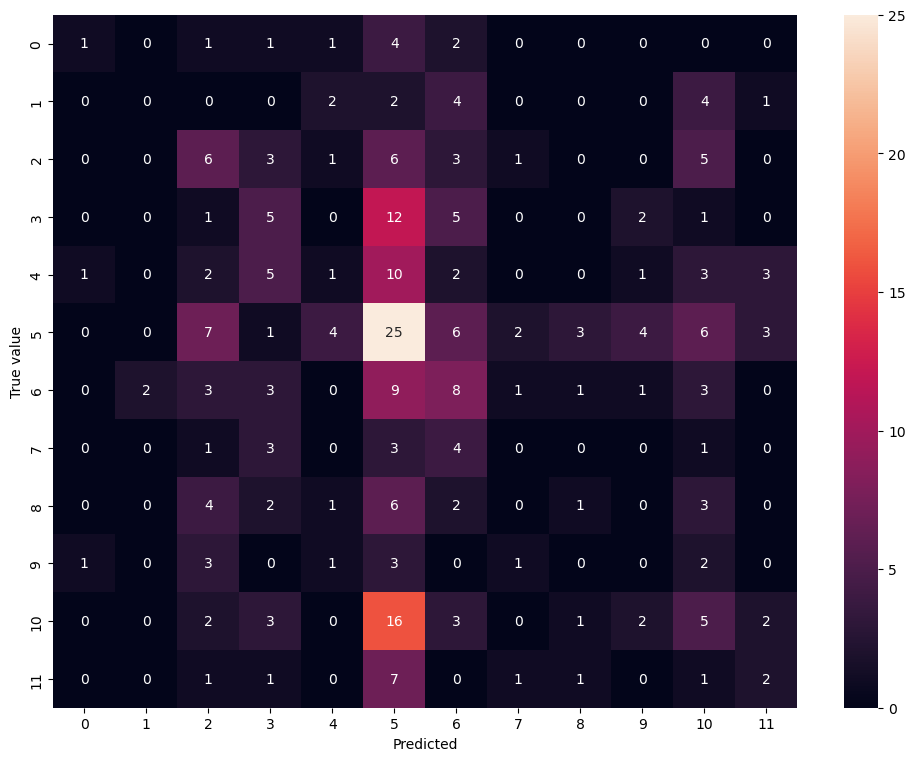

In [44]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (5,4) & (5,3) with 10,10 incorrect classifications represents how bipolar & behavioural with depressive disorders were misclassified often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [45]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.33      0.10      0.15        10
           2       0.00      0.00      0.00        13
           3       0.19      0.24      0.21        25
           4       0.19      0.19      0.19        26
           5       0.09      0.04      0.05        28
           6       0.24      0.41      0.30        61
           7       0.21      0.26      0.23        31
           8       0.00      0.00      0.00        12
           9       0.14      0.05      0.08        19
          10       0.00      0.00      0.00        11
          11       0.15      0.15      0.15        34
          12       0.18      0.14      0.16        14

    accuracy                           0.19       284
   macro avg       0.14      0.13      0.13       284
weighted avg       0.17      0.19      0.17       284



In [46]:
# Sources used to help develop the code.

# https://www.kaggle.com/code/dansbecker/shap-values
# https://www.google.com/search?q=..mean%280%29&sca_esv=556524961&sxsrf=AB5stBiz1lOvo0OlZAudc68UXxA6dpZvbQ%3A1691933544678&ei=aNvYZJSIKZaGxc8P37S-iAE&ved=0ahUKEwiU3KfP39mAAxUWQ_EDHV-aDxEQ4dUDCBA&uact=5&oq=..mean%280%29&gs_lp=Egxnd3Mtd2l6LXNlcnAiCS4ubWVhbigwKTIEEAAYHjIEEAAYHjIEEAAYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeSLUpUABYoidwAngAkAEAmAF6oAGVCKoBAzYuNbgBA8gBAPgBAcICCBAAGIAEGLEDwgIFEAAYgATCAgsQABiABBixAxiDAcICBRAuGIAEwgIUEC4YgAQYlwUY3AQY3gQY4ATYAQHCAgoQLhgeGMcBGNEDwgIHEAAYHhjJA8ICCBAAGIoFGJIDwgIGEAAYHhgKwgIHEAAYHhjxBMICBhAAGB4YD8ICCBAAGAUYHhgKwgIGEAAYBRgewgIIEAAYCBgeGA_iAwQYACBBiAYBugYGCAEQARgU&sclient=gws-wiz-serp
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://github.com/shap/shap/issues/632
# https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
# https://datagy.io/python-optuna/
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Census%20income%20classification%20with%20scikit-learn.html
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Iris%20classification%20with%20scikit-learn.html
# https://medium.com/mlearning-ai/multiclass-classification-with-auto-tuning-catboost-5d352e30778d
# https://forecastegy.com/posts/catboost-hyperparameter-tuning-guide-with-optuna/
# https://github.com/optuna/optuna-examples/blob/main/xgboost/xgboost_simple.py
# https://stackoverflow.com/questions/57400492/select-columns-of-pandas-dataframe-if-name-is-in-list-or-create-default-and-dro
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/shap_values_tutorial.ipynb
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://pub.aimind.so/hyperparameter-optimization-of-random-forest-model-using-optuna-for-a-regression-problem-6f49d9b520b7
# https://forecastegy.com/posts/how-to-use-optuna-to-tune-lightgbm-hyperparameters/
# https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
# https://drbeane.github.io/python_ml/pages/autosearch.html
# https://www.kaggle.com/code/dansbecker/shap-values
# https://www.google.com/search?q=..mean%280%29&sca_esv=556524961&sxsrf=AB5stBiz1lOvo0OlZAudc68UXxA6dpZvbQ%3A1691933544678&ei=aNvYZJSIKZaGxc8P37S-iAE&ved=0ahUKEwiU3KfP39mAAxUWQ_EDHV-aDxEQ4dUDCBA&uact=5&oq=..mean%280%29&gs_lp=Egxnd3Mtd2l6LXNlcnAiCS4ubWVhbigwKTIEEAAYHjIEEAAYHjIEEAAYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeSLUpUABYoidwAngAkAEAmAF6oAGVCKoBAzYuNbgBA8gBAPgBAcICCBAAGIAEGLEDwgIFEAAYgATCAgsQABiABBixAxiDAcICBRAuGIAEwgIUEC4YgAQYlwUY3AQY3gQY4ATYAQHCAgoQLhgeGMcBGNEDwgIHEAAYHhjJA8ICCBAAGIoFGJIDwgIGEAAYHhgKwgIHEAAYHhjxBMICBhAAGB4YD8ICCBAAGAUYHhgKwgIGEAAYBRgewgIIEAAYCBgeGA_iAwQYACBBiAYBugYGCAEQARgU&sclient=gws-wiz-serp
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://github.com/shap/shap/issues/632
# https://stackoverflow.com/questions/57400492/select-columns-of-pandas-dataframe-if-name-is-in-list-or-create-default-and-dro
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/shap_values_tutorial.ipynb
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html